In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r'C:\Users\User2-NB\Downloads\Placement_Data_Full_Class.csv')

In [4]:
df_enc = pd.read_csv(r'C:\Users\User2-NB\Downloads\Placement_Data_Full_Class.csv')

In [5]:
df.head(5)

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [451]:
df.drop(['sl_no'],axis = 1, inplace = True)

In [452]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.describe()

sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000

In [8]:
def encoderz(df,encode):
    le = LabelEncoder()
    le.fit(df[encode])
    new_encodes = le.transform(df[encode])
    return new_encodes

In [9]:
to_encode = ['gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation','status','workex']

In [10]:
for i,j in enumerate(to_encode):
    df_enc[j] = encoderz(df_enc,j)

In [11]:
df_enc.head()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1       1  67.00      1  91.00      1      1     58.00         2   
1      2       1  79.33      0  78.33      1      2     77.48         2   
2      3       1  65.00      0  68.00      0      0     64.00         0   
3      4       1  56.00      0  52.00      0      2     52.00         2   
4      5       1  85.80      0  73.60      0      1     73.30         0   

   workex  etest_p  specialisation  mba_p  status    salary  
0       0     55.0               1  58.80       1  270000.0  
1       1     86.5               0  66.28       1  200000.0  
2       0     75.0               0  57.80       1  250000.0  
3       0     66.0               1  59.43       0       NaN  
4       0     96.8               0  55.50       1  425000.0

In [12]:
for i,j in enumerate(to_encode):
    print(df[j].value_counts())

M    139
F     76
Name: gender, dtype: int64
Central    116
Others      99
Name: ssc_b, dtype: int64
Others     131
Central     84
Name: hsc_b, dtype: int64
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
Placed        148
Not Placed     67
Name: status, dtype: int64
No     141
Yes     74
Name: workex, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [14]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int32  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int32  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int32  
 6   hsc_s           215 non-null    int32  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int32  
 9   workex          215 non-null    int32  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int32  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int32  
 14  salary          148 non-null    float64
dtypes: float64(6), int32(8), int64(1)
memory usage: 18.6 KB


In [279]:
for j in ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']:
    print(df[j].value_counts())

M    139
F     76
Name: gender, dtype: int64
Central    116
Others      99
Name: ssc_b, dtype: int64
Others     131
Central     84
Name: hsc_b, dtype: int64
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
No     141
Yes     74
Name: workex, dtype: int64
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
Placed        148
Not Placed     67
Name: status, dtype: int64


In [15]:
# dtype of 'salary' changed to 'object' type instead of 'float'

In [16]:
data = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']
target = 'salary'

In [17]:
def scat(df,data,target):
    fig, axes = plt.subplots(ncols = 1, nrows = len(data), figsize = (15,40))
    for i,j in enumerate(data):
        title = j.capitalize() + " versus " + target.capitalize()
        axes[i].scatter(df[j].values, df[target].values)
        axes[i].set_title(title)
    plt.suptitle("Grades and other numeric features\ninfluence on salaries among placed students", fontsize = 35)
    plt.show()

In [18]:
# scat(placed_df,data,target)

In [146]:
def plot(df, hue, main, titlebeg = None):
    fig, axes = plt.subplots(nrows = len(hue), ncols = 1, figsize = (20,35))
    nums = range(len(hue))
    main_label = main.capitalize()
    if titlebeg == None:
        title = ''
        for c,k in enumerate(np.unique(df[main])):
            if c < len(np.unique(df[main])) - 1:
                title += k + ' and '
            else:
                title += k
    else:
        title = ''
        title += titlebeg
        for c,k in enumerate(np.unique(df[main])):
            if c < len(np.unique(df[main])) - 1:
                title += k + ' and '
            else:
                title += k
    title += '\ncountplots with different hues'
    for i,j in zip(nums, hue):
        sns.countplot(df[main], hue = df[j], ax = axes[i])
        axes[i].legend(loc = 'best', prop = {'size':16}).set_title(j.capitalize(), prop = {'size': 16})
        axes[i].set_xlabel(main_label, fontsize = 15)
        axes[i].set_ylabel('Frequency', fontsize = 16)
        axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
        axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
    plt.suptitle(title[:], fontsize = 65)
    plt.show()

In [20]:
hues = ['gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation','workex']
main = 'status'

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

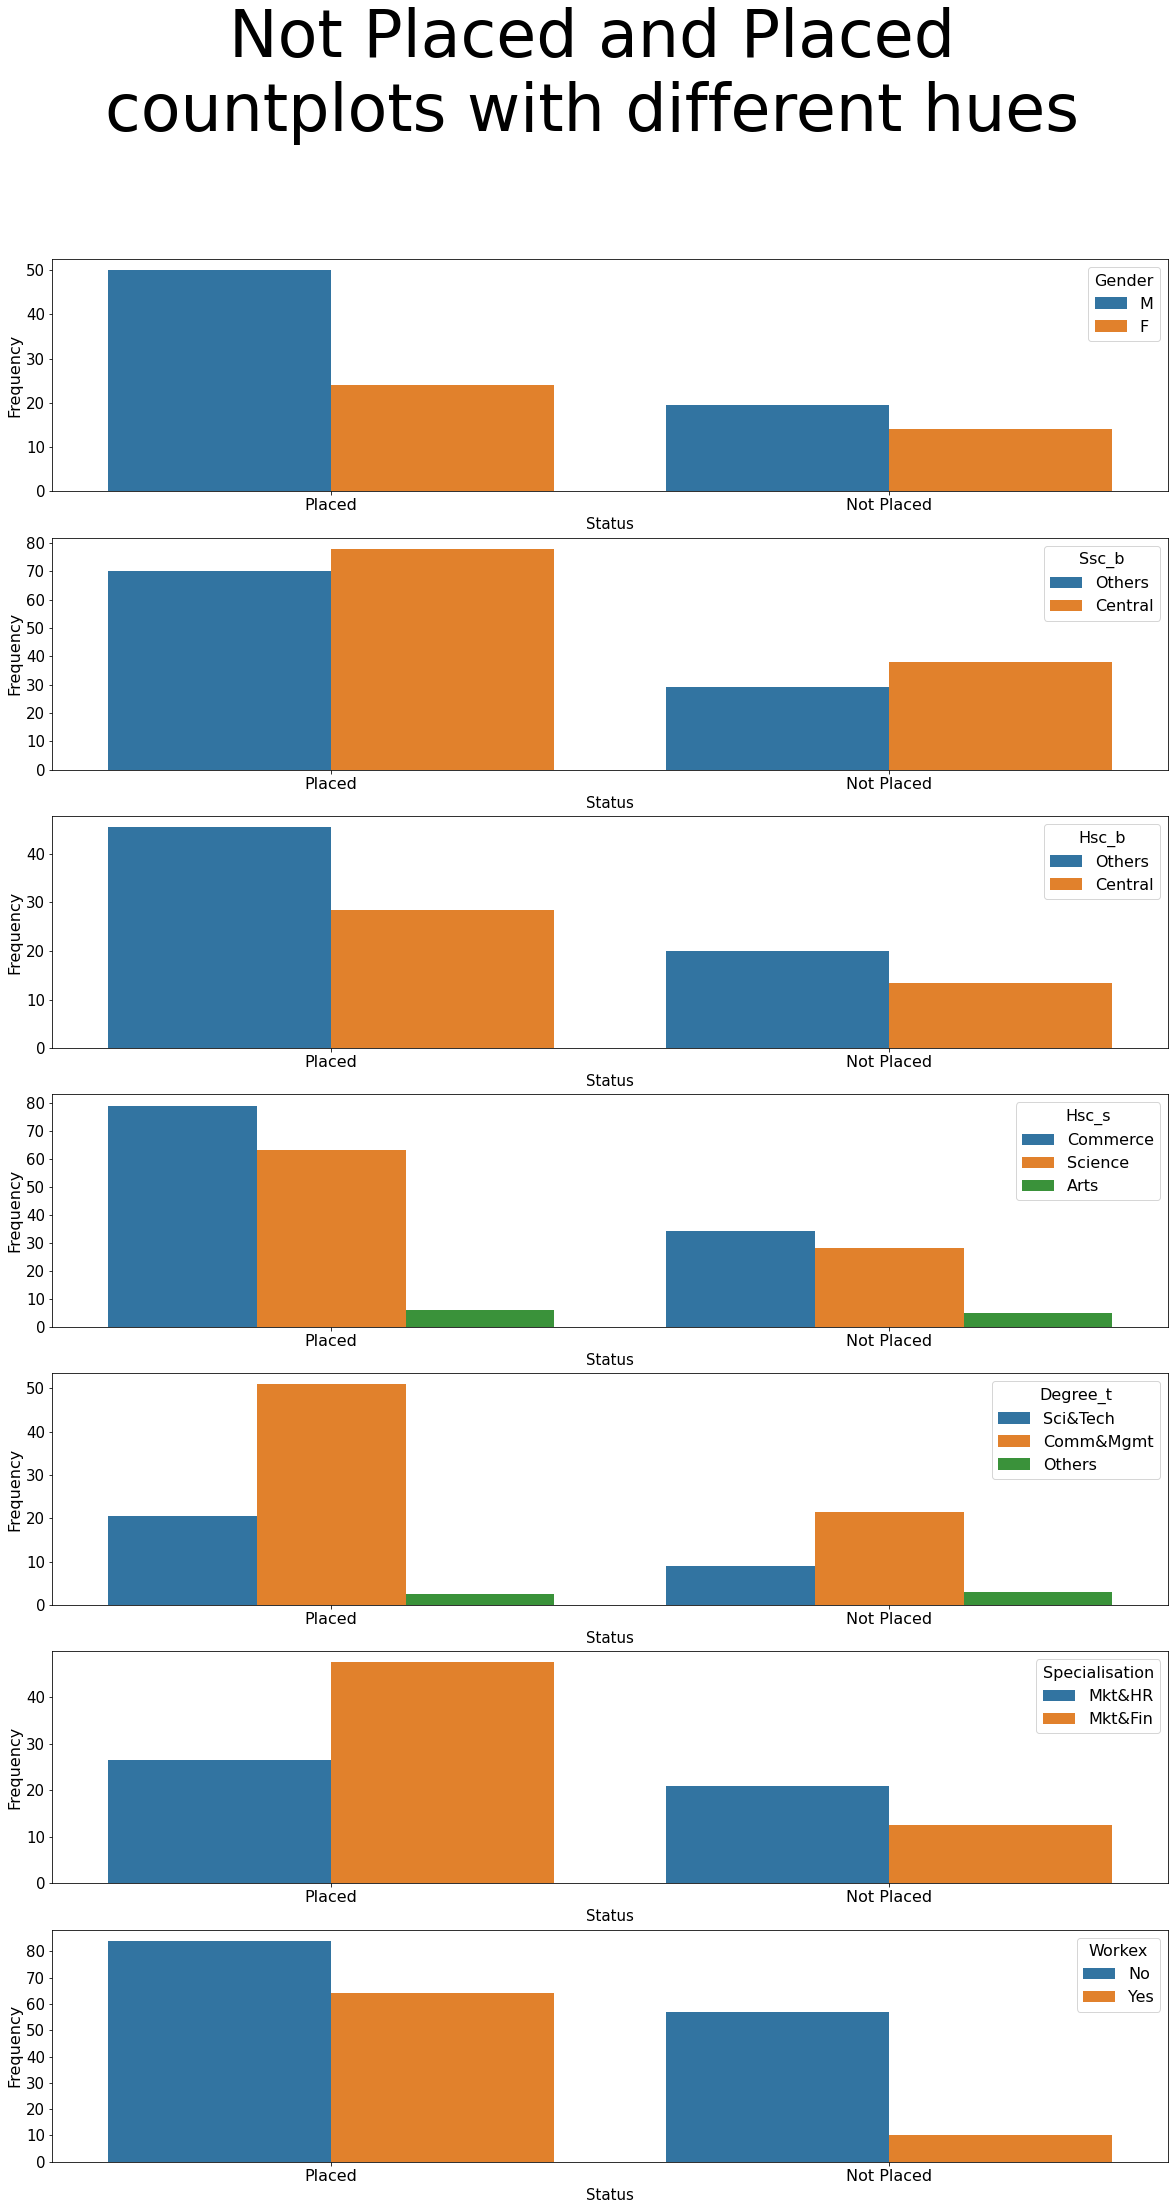

In [147]:
plot(df,hues,main)

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Placed and Non-placed students')

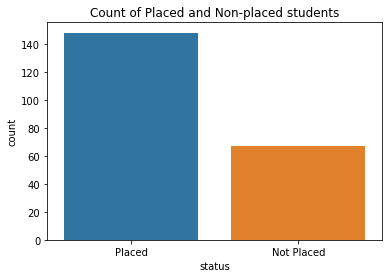

In [22]:
sns.countplot(df[main])
plt.title('Count of Placed and Non-placed students')

In [23]:
#graphs above are countplots of categorical variables that may or may not influence the status

In [24]:
status = 'status'
gender = 'gender'
others = ['ssc_b','hsc_b','hsc_s','degree_t','specialisation','workex']
def cross(df,status,gender,others):
    tab = []
    for i,j in enumerate(others):
        tab.append(pd.crosstab(df[status],[df[gender],df[j]], rownames = [status], colnames = [gender,j]))
    return tab

In [25]:
tabs = cross(df,status,gender,others)

In [26]:
tabs[0]

gender           F              M       
ssc_b      Central Others Central Others
status                                  
Not Placed      17     11      21     18
Placed          25     23      53     47

In [27]:
tabs[1]

gender           F              M       
hsc_b      Central Others Central Others
status                                  
Not Placed      13     15      14     25
Placed          20     28      37     63

In [28]:
tabs[2]

gender        F                     M                 
hsc_s      Arts Commerce Science Arts Commerce Science
status                                                
Not Placed    2       18       8    3       16      20
Placed        4       22      22    2       57      41

In [29]:
tabs[3]

gender             F                         M                
degree_t   Comm&Mgmt Others Sci&Tech Comm&Mgmt Others Sci&Tech
status                                                        
Not Placed        20      2        6        23      4       12
Placed            33      4       11        69      1       30

In [30]:
tabs[4]

gender               F              M       
specialisation Mkt&Fin Mkt&HR Mkt&Fin Mkt&HR
status                                      
Not Placed           9     19      16     23
Placed              28     20      67     33

In [31]:
tabs[5]

gender       F       M    
workex      No Yes  No Yes
status                    
Not Placed  24   4  33   6
Placed      30  18  54  46

In [143]:
def usual_countplots(df,feats):
    fir, axes = plt.subplots(nrows = len(feats), ncols = 1, figsize = (15,45))
    for i,j in enumerate(feats):
        ax_title = j.capitalize() + " frequency count"
        sns.countplot(df[j], ax = axes[i])
        axes[i].set_title(ax_title, fontdict = {'size':15})
        axes[i].set_xlabel(j, fontsize = 15)
        axes[i].set_ylabel('Frequency', fontsize = 15)
        axes[i].set_xticklabels(df[j].value_counts().index, Fontsize = 15)
        axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fontsize = 15)
    plt.tight_layout()
    plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-143-6e79b2205886>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[j].value_counts().index, Fontsize = 15)
<ipython-input-143-6e79b2205886>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fontsize = 15)
<ipython-input-143-6e79b2205886>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fon

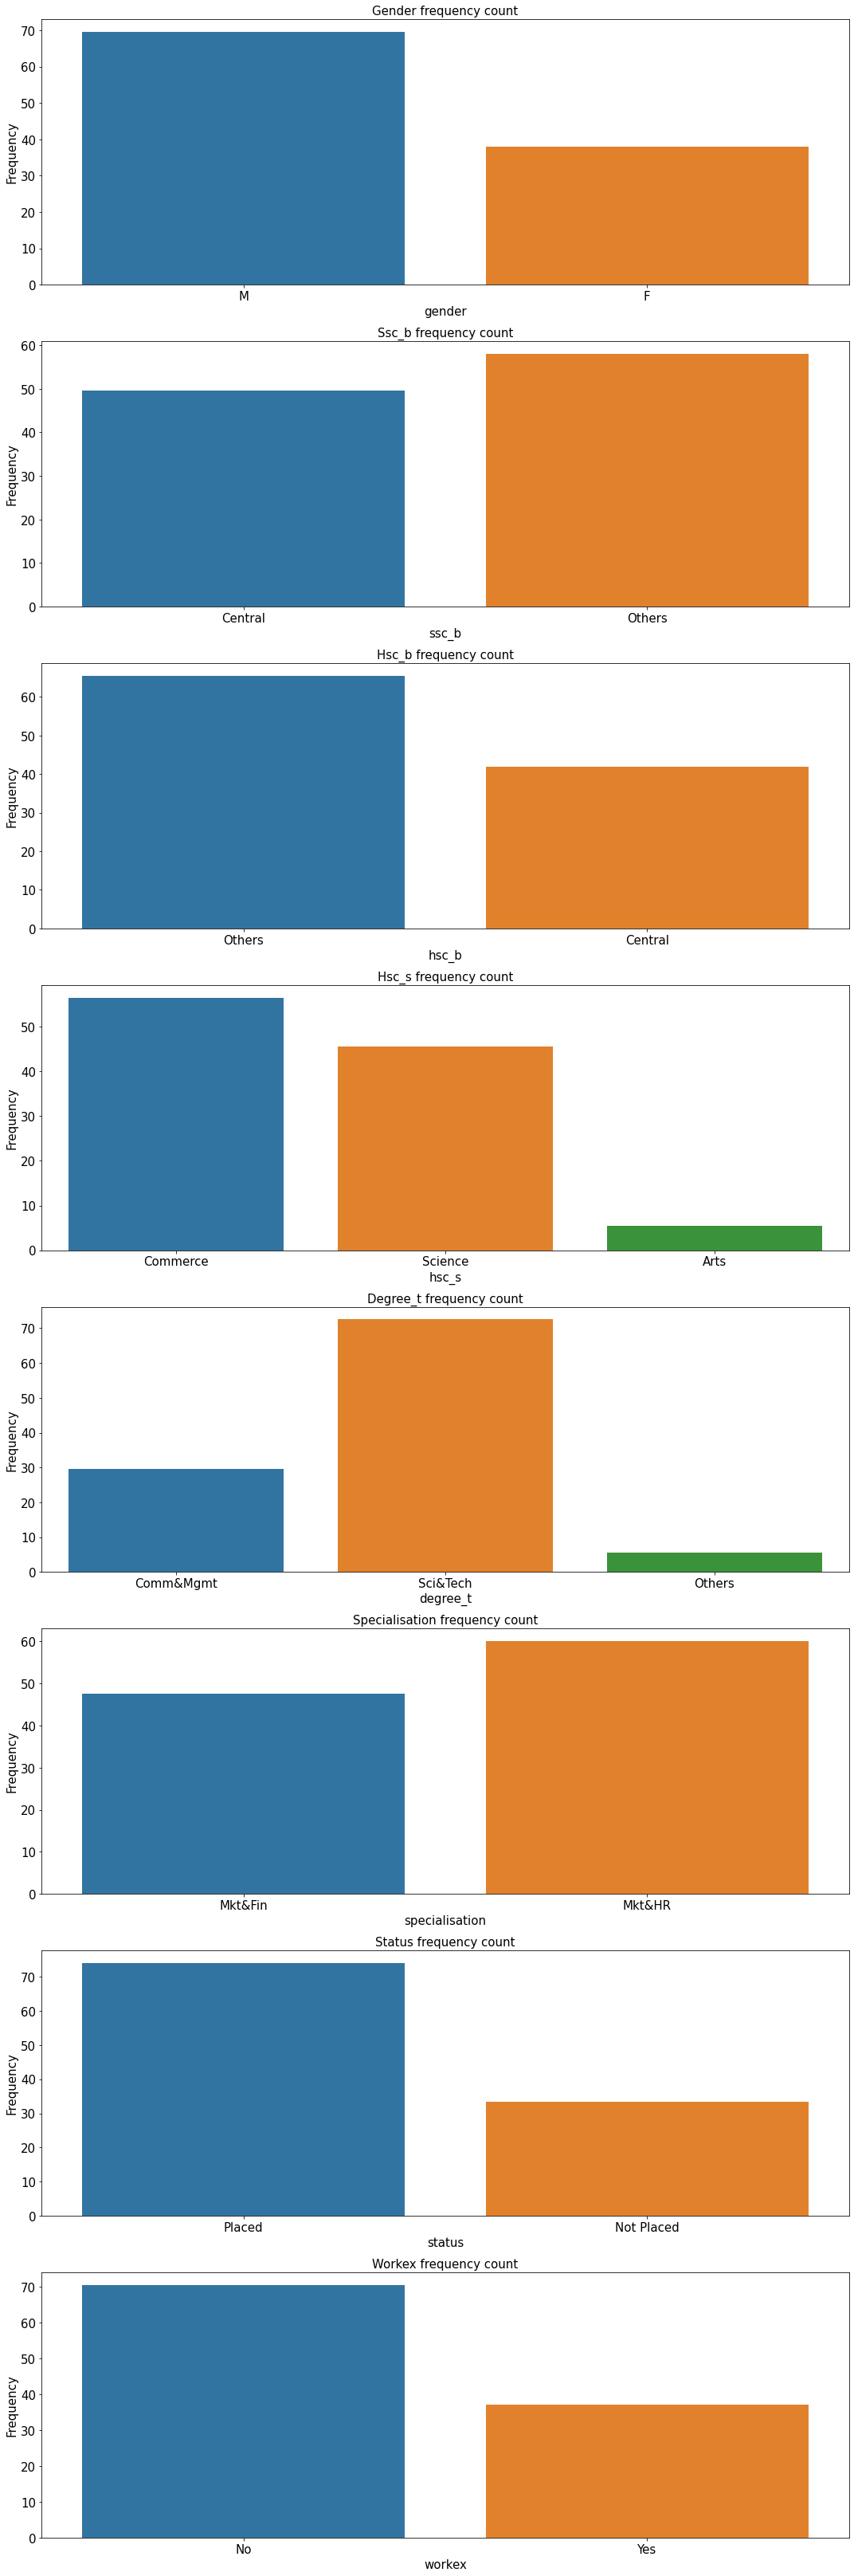

In [144]:
usual_countplots(df,to_encode)

In [34]:
# frequency countplots of categorical features

In [294]:
#importing learning algorithms for regression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

In [413]:
#importing learning algorithms for classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [280]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, r2_score, f1_score
from sklearn.metrics import confusion_matrix

In [118]:
encoded_placed = df_enc[df_enc['status'] == 1]
placed = df[df['status'] == 'Placed']

In [37]:
placed_male = placed[placed['gender'] == 'M']
placed_female = placed[placed['gender'] == 'F']

In [38]:
placed_male.shape

(100, 15)

In [39]:
placed_female.shape

(48, 15)

In [40]:
placed.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   
7      8      M  82.00  Central  64.00  Central   Science     66.00   

    degree_t workex  etest_p specialisation  mba_p  status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80  Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28  Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80  Placed  250000.0  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50  Placed  425000.0  
7   Sci&Tech    Yes     67.0        Mkt&Fin  62.14  Placed  252000.0

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anac

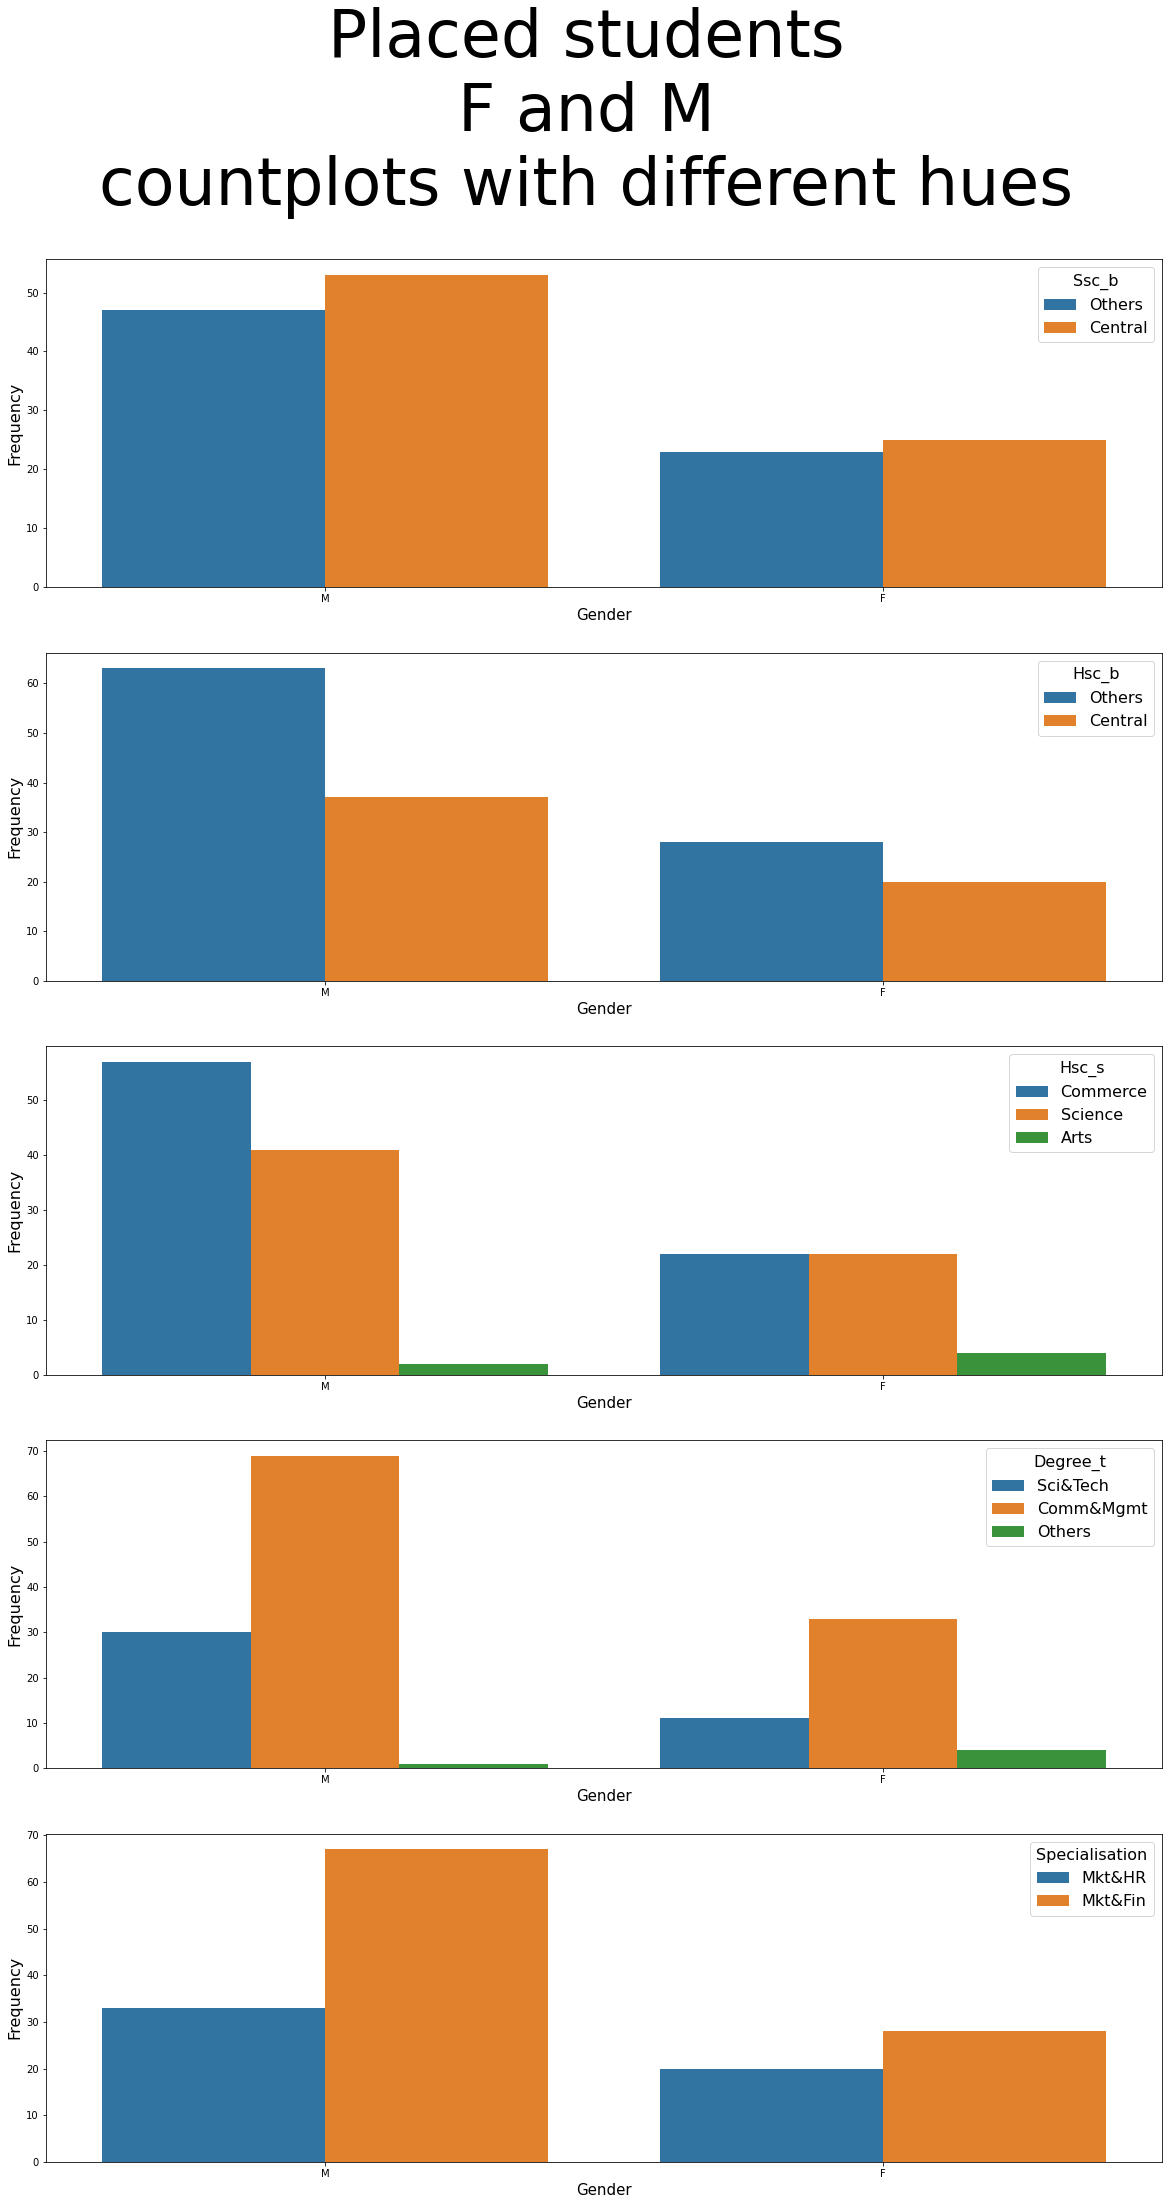

In [134]:
plot(placed,['ssc_b','hsc_b','hsc_s','degree_t','specialisation'],'gender','Placed students\n')

In [42]:
tabs_placed = cross(placed,status,gender,others)

In [43]:
tabs_placed[0]

gender       F              M       
ssc_b  Central Others Central Others
status                              
Placed      25     23      53     47

In [44]:
tabs_placed[1]

gender       F              M       
hsc_b  Central Others Central Others
status                              
Placed      20     28      37     63

In [45]:
tabs_placed[2]

gender    F                     M                 
hsc_s  Arts Commerce Science Arts Commerce Science
status                                            
Placed    4       22      22    2       57      41

In [46]:
tabs_placed[3]

gender           F                         M                
degree_t Comm&Mgmt Others Sci&Tech Comm&Mgmt Others Sci&Tech
status                                                      
Placed          33      4       11        69      1       30

In [47]:
tabs_placed[4]

gender               F              M       
specialisation Mkt&Fin Mkt&HR Mkt&Fin Mkt&HR
status                                      
Placed              28     20      67     33

In [48]:
tabs_placed[5]

gender   F       M    
workex  No Yes  No Yes
status                
Placed  30  18  54  46

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-143-6e79b2205886>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[j].value_counts().index, Fontsize = 15)
<ipython-input-143-6e79b2205886>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fontsize = 15)
<ipython-input-143-6e79b2205886>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fon

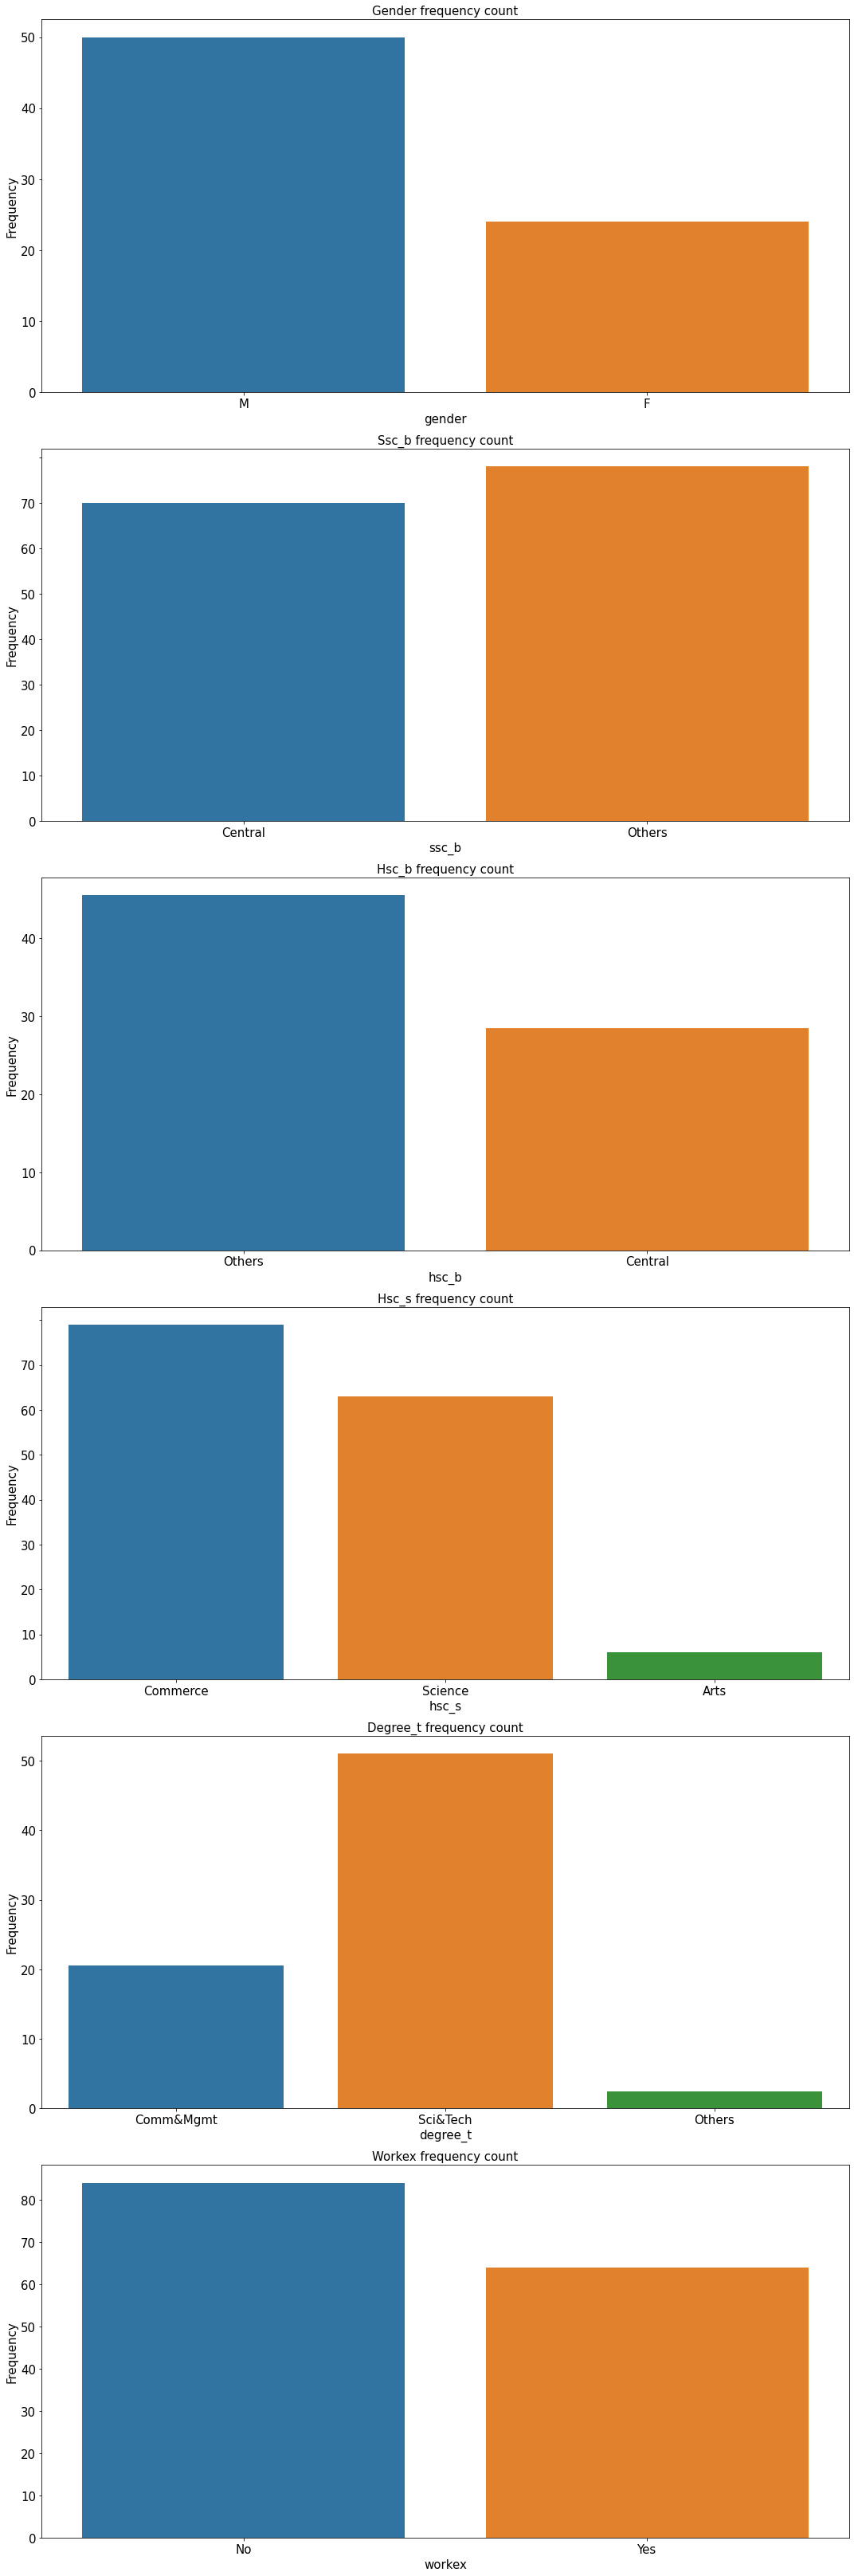

In [148]:
usual_countplots(placed,['gender','ssc_b','hsc_b','hsc_s','degree_t','workex'])

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

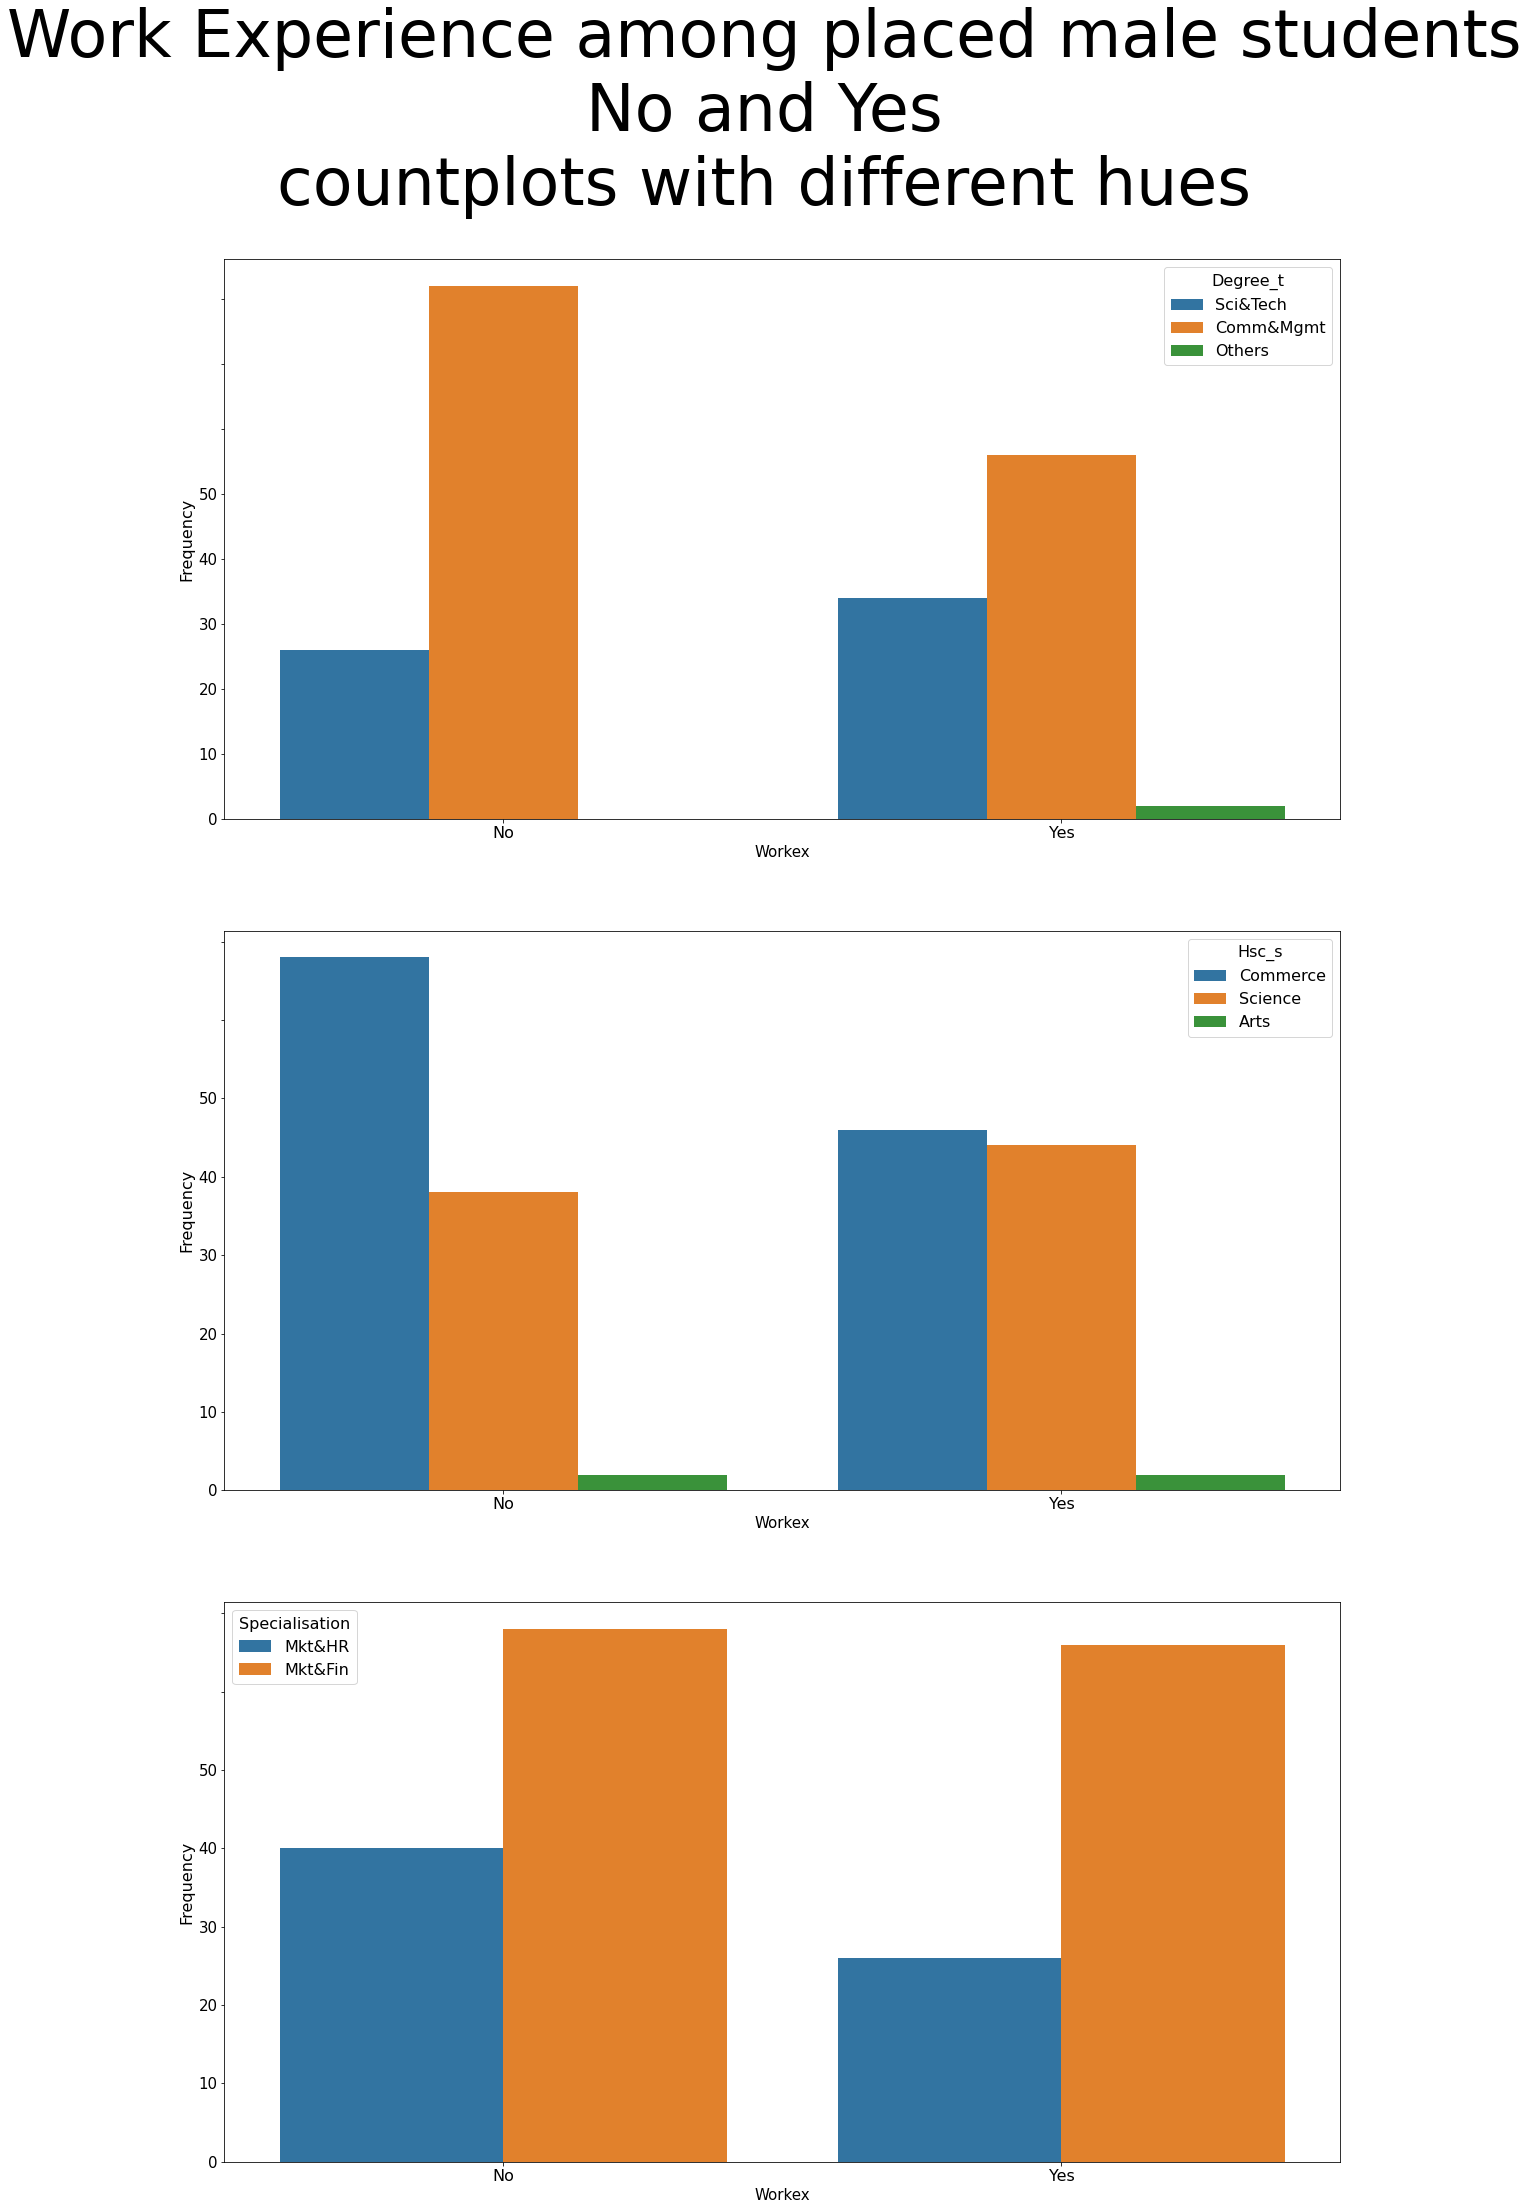

In [164]:
plot(placed_male,['degree_t','hsc_s','specialisation'],'workex','Work Experience among placed male students\n')

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

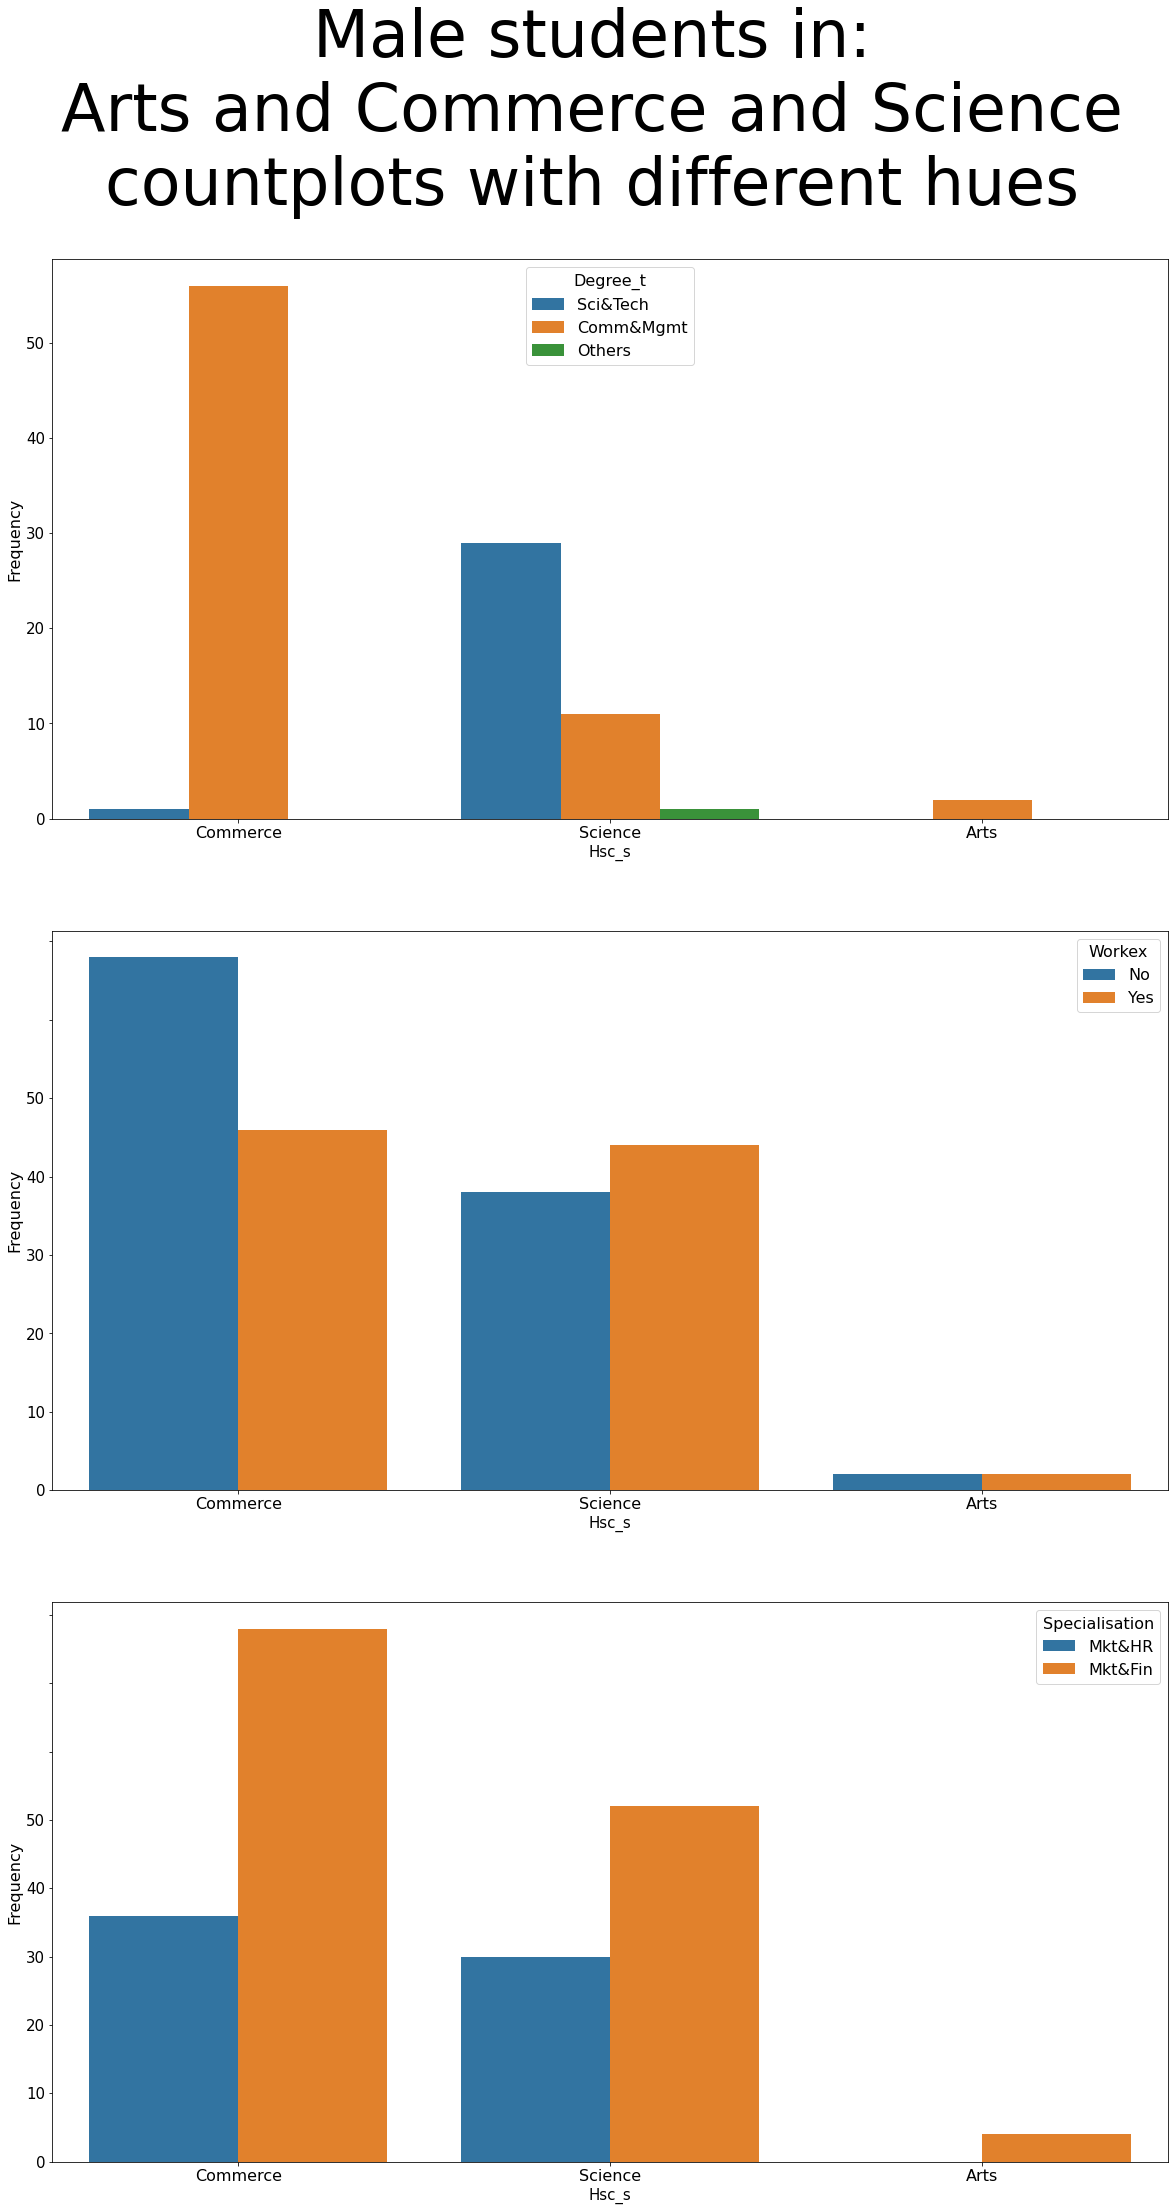

In [165]:
plot(placed_male,['degree_t','workex','specialisation'],'hsc_s','Male students in:\n')

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

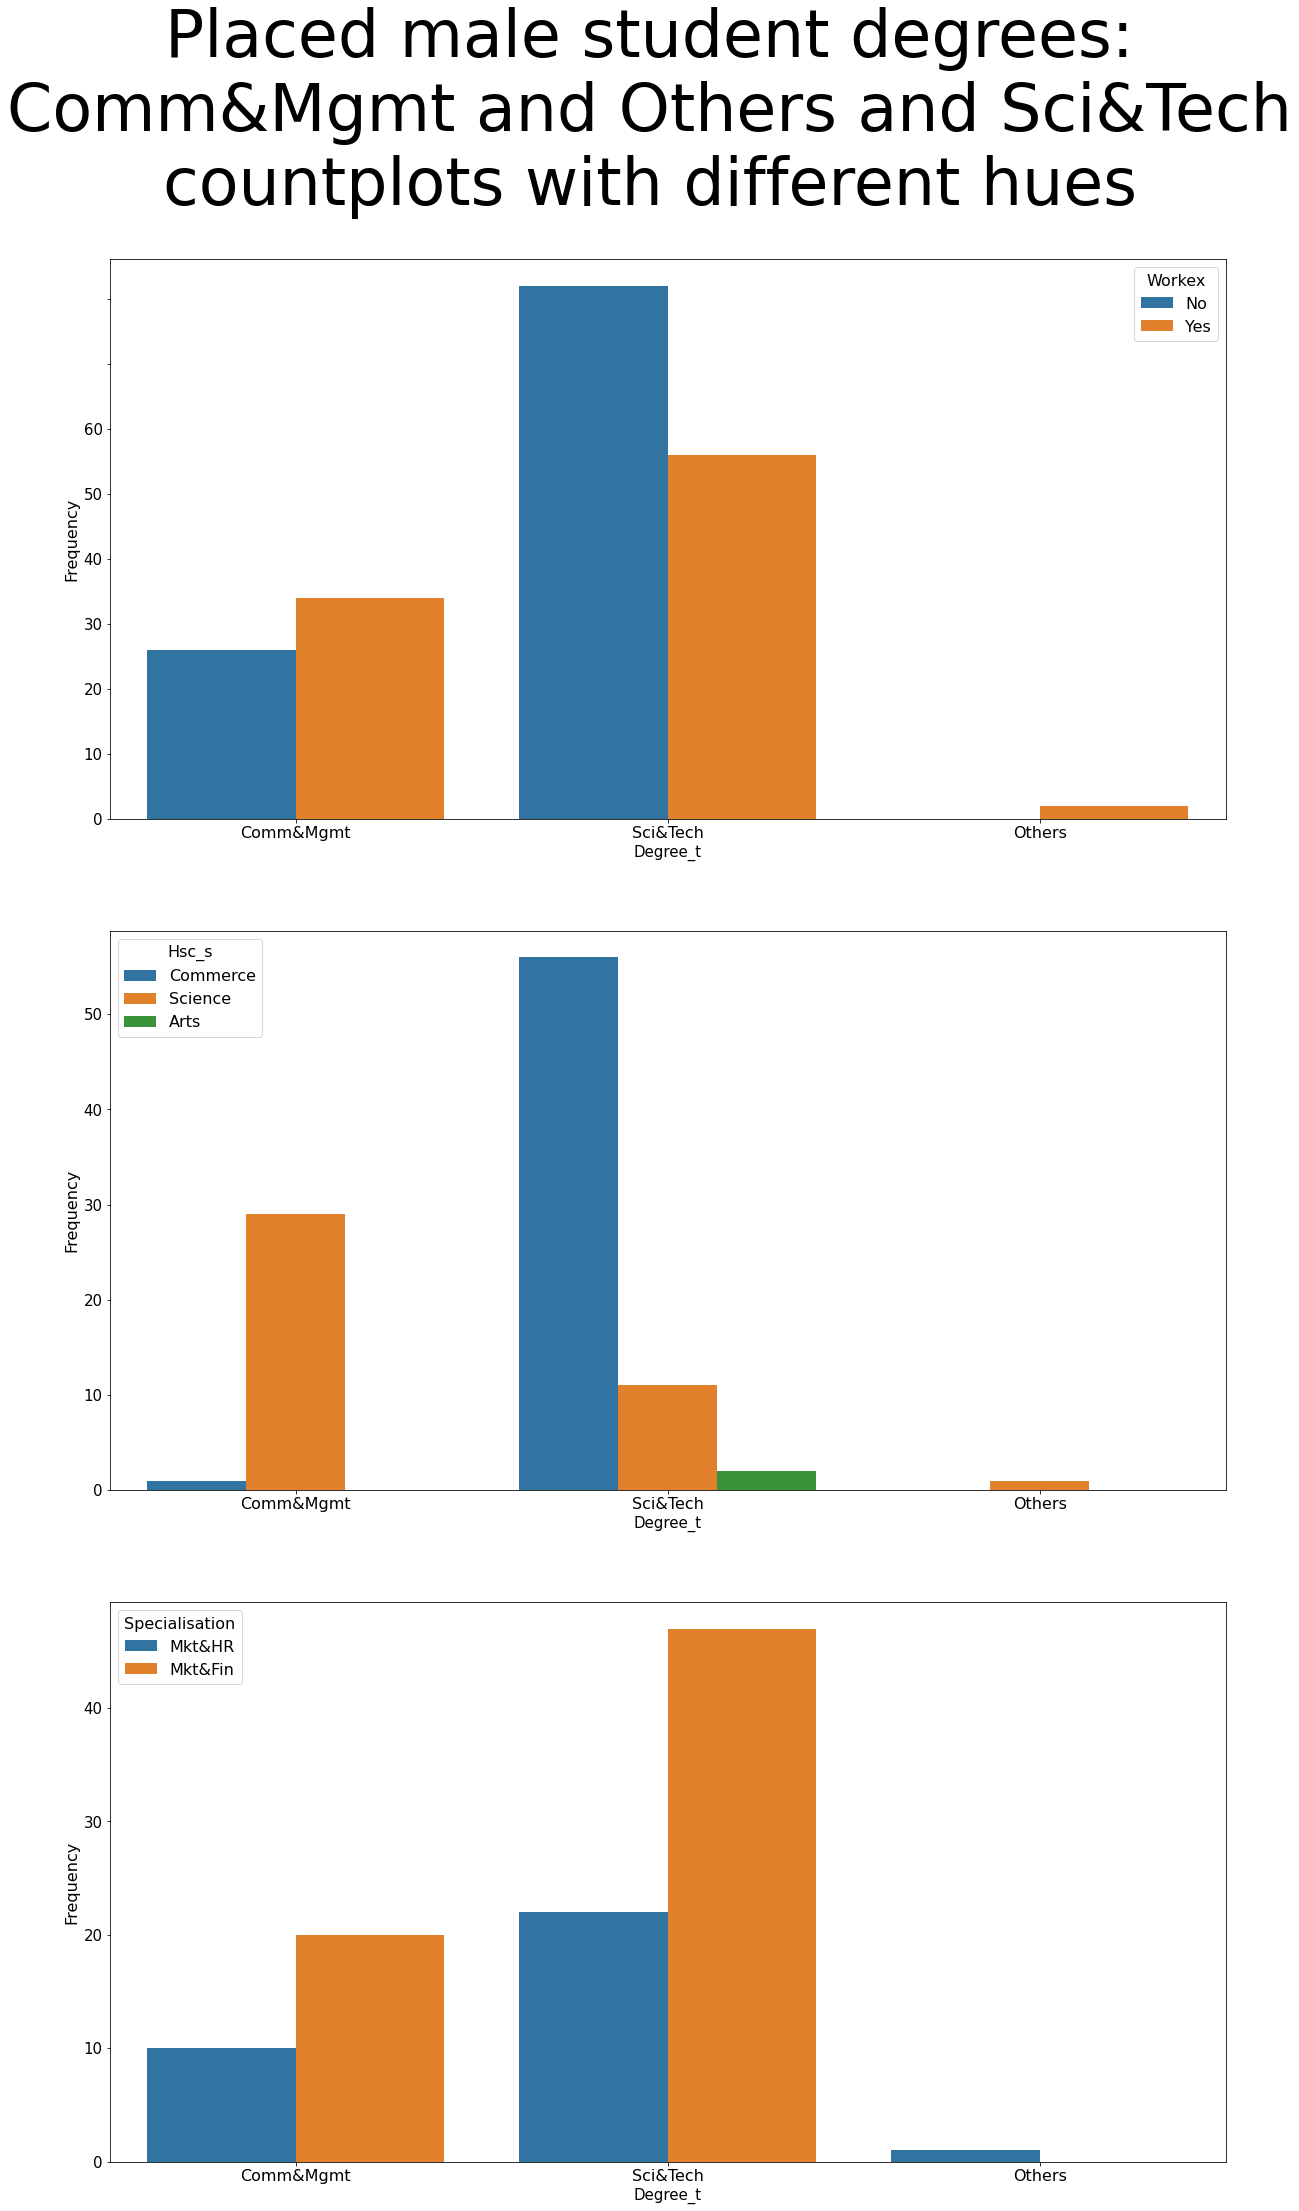

In [166]:
plot(placed_male,['workex','hsc_s','specialisation'],'degree_t','Placed male student degrees:\n')

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

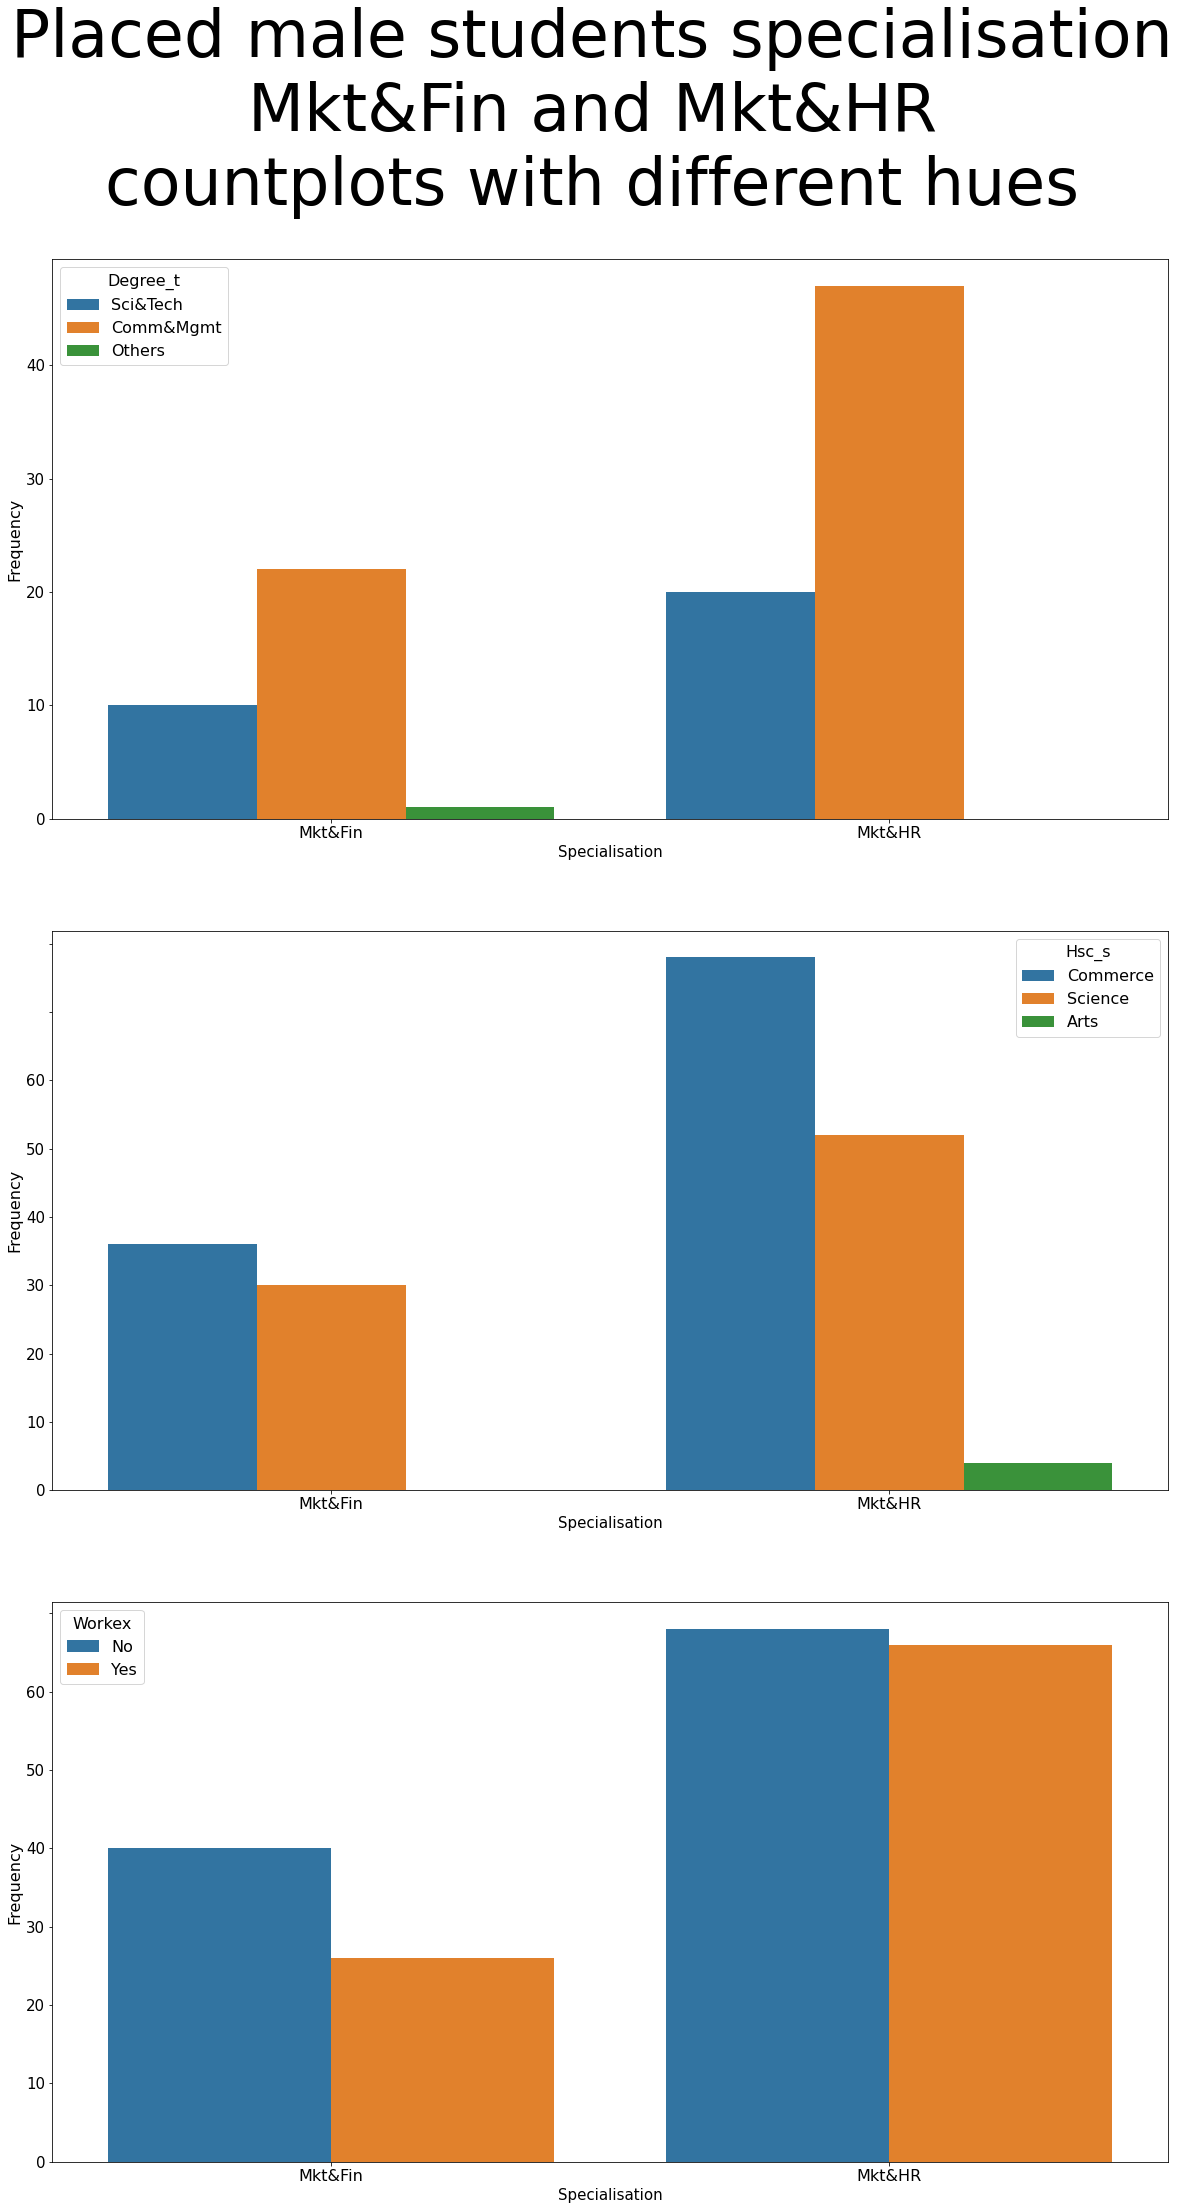

In [167]:
plot(placed_male,['degree_t','hsc_s','workex'],'specialisation','Placed male students specialisation\n')

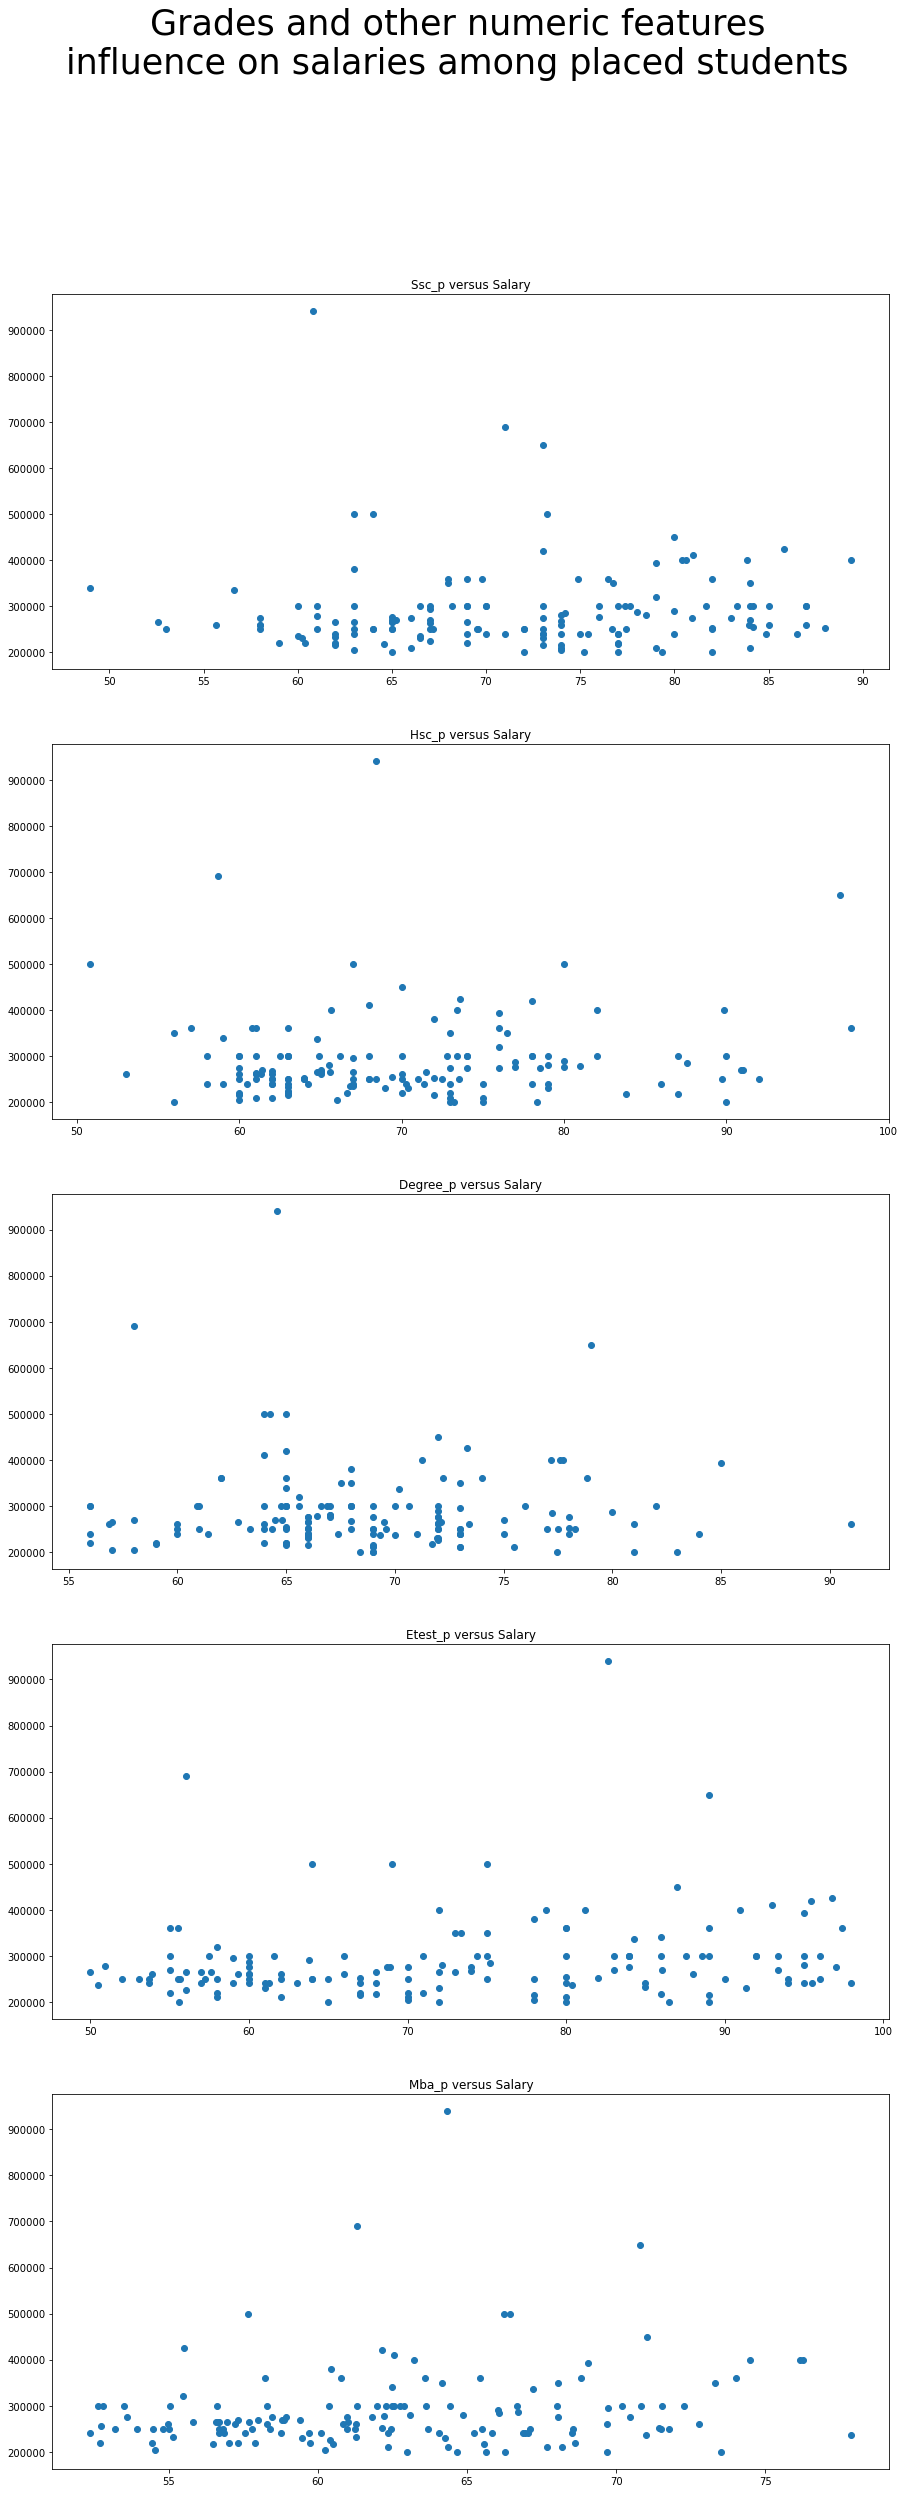

In [51]:
scat(placed,data,target)

In [95]:
def scat_class(df,data,target, hues):
    fig, axes = plt.subplots(nrows = len(data), ncols = len(hues), figsize = (25,15))
    for i,j in enumerate(data):
        for z,c in enumerate(hues):
            for k,l in enumerate(np.unique(df[c])):
                x = df[df[c] == l]
                axes[i][z].scatter(x[j],x[target], label = l)
                axes[i][z].legend(loc = 'best', prop = {'size':12}).set_title(c.capitalize(), prop = {'size':12})
                axes[i][z].set_xticks(())
                axes[i][z].set_yticks(())
    plt.tight_layout()
    plt.show()

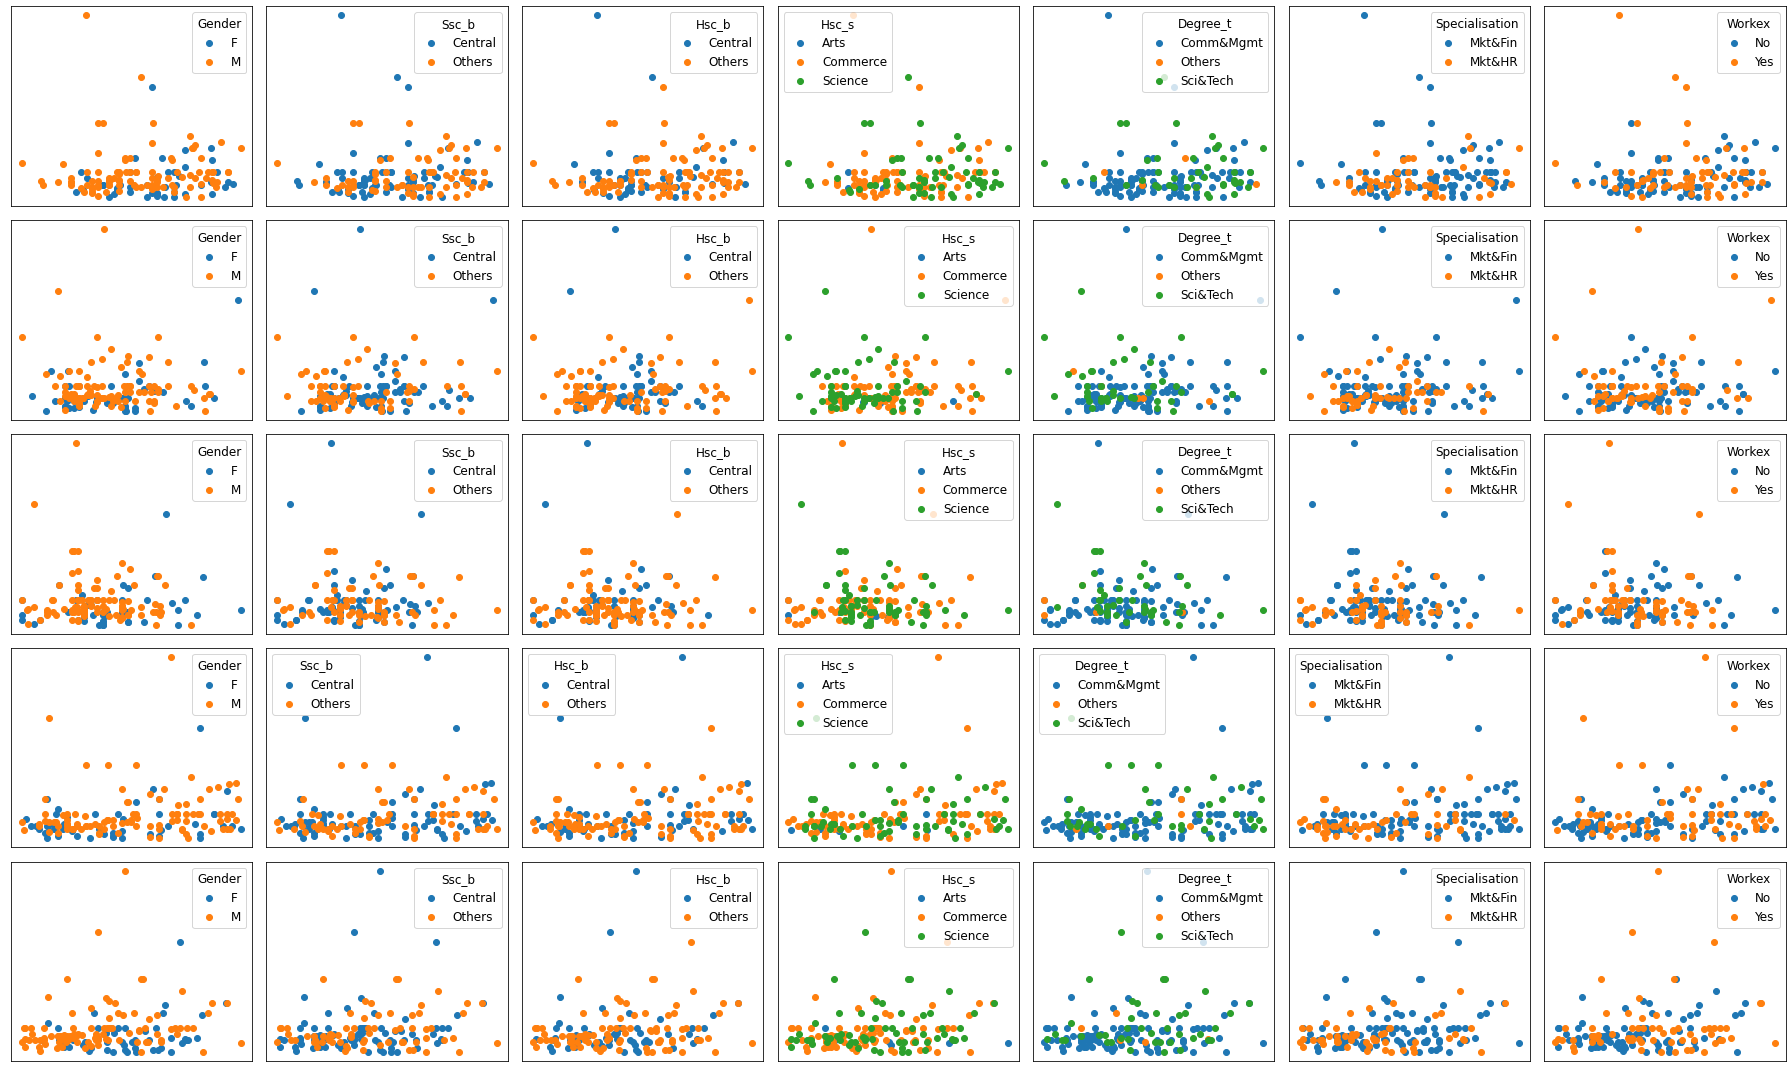

In [119]:
scat_class(placed,data, target, hues)

In [117]:
#scatterplots with classifications, all numerics features with different categories for all placed students

In [114]:
def cap(words):
    to = list(words)
    capital_letter = to[0]
    l = capital_letter.upper()
    for i in range(1,len(words)):
        l+=to[i]
    return l
# this one is just for fun, not related

In [116]:
cap("hello, Argentina")

'Hello, Argentina'

In [120]:
def boxplots(df,cat,targets):
    fig, axes = plt.subplots(nrows = len(cat), ncols = len(targets), figsize = (20,20))
    for i,j in enumerate(cat):
        for z,c in enumerate(targets):
            sns.boxplot(x = df[j], y = df[c], ax = axes[i][z])
    plt.tight_layout()
    plt.show()

In [122]:
placed.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   
7      8      M  82.00  Central  64.00  Central   Science     66.00   

    degree_t workex  etest_p specialisation  mba_p  status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80  Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28  Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80  Placed  250000.0  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50  Placed  425000.0  
7   Sci&Tech    Yes     67.0        Mkt&Fin  62.14  Placed  252000.0

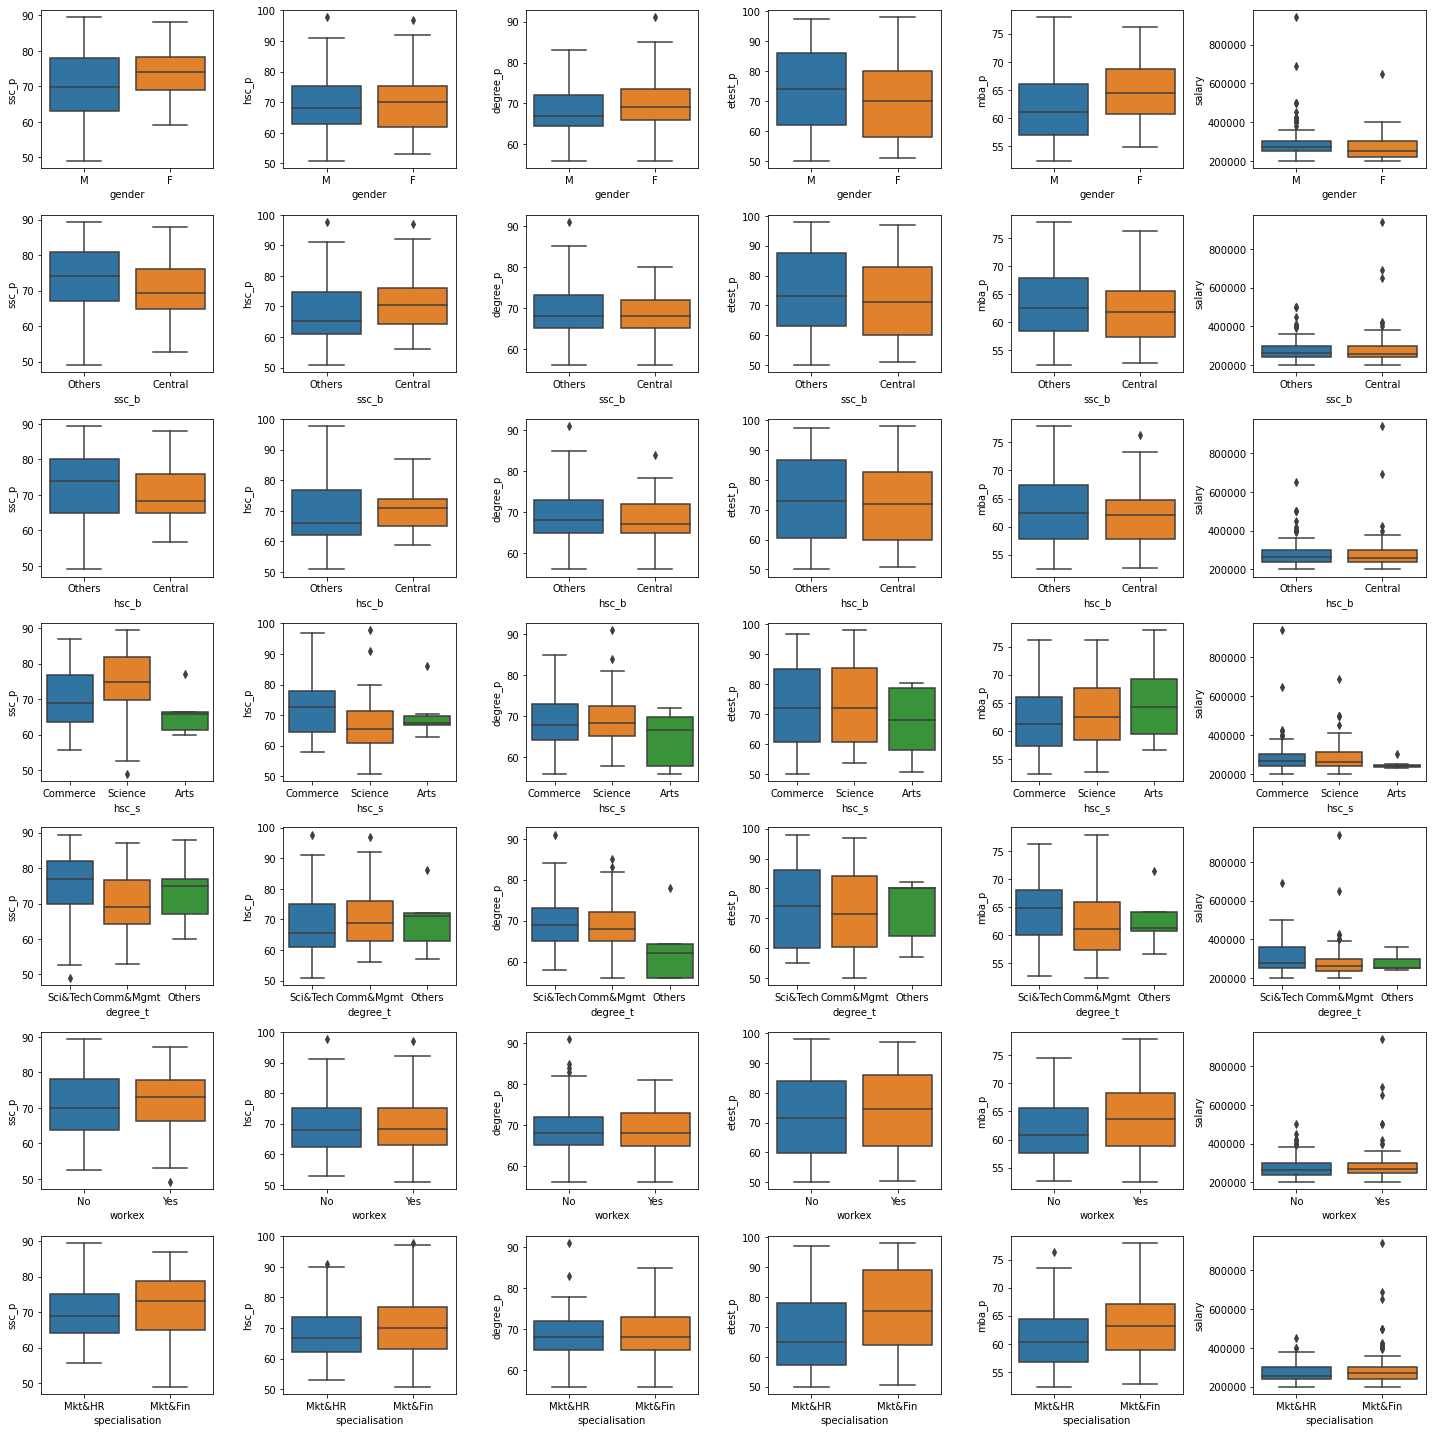

In [123]:
boxplots(placed, ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'], ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary'])

In [124]:
#boxplots for placed students, to detect outliers

In [151]:
#general description of placed m students
placed_male.describe()

sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   110.190000   70.664900   69.774000   67.849500   74.439900   61.601200   
std     62.483565    9.075091    8.899536    5.701049   13.450625    5.945544   
min      1.000000   49.000000   50.830000   56.000000   50.000000   52.380000   
25%     60.750000   63.000000   63.000000   64.575000   62.000000   57.007500   
50%    114.000000   69.800000   68.000000   66.945000   74.000000   61.000000   
75%    158.750000   77.877500   75.250000   72.000000   86.000000   66.045000   
max    213.000000   89.400000   97.700000   83.000000   97.400000   77.890000   

              salary  
count     100.000000  
mean   298910.000000  
std     99514.792058  
min    200000.000000  
25%    250000.000000  
50%    270000.000000  
75%    300000.000000  
max    940000.000000

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-143-6e79b2205886>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[j].value_counts().index, Fontsize = 15)
<ipython-input-143-6e79b2205886>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fontsize = 15)
<ipython-input-143-6e79b2205886>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fon

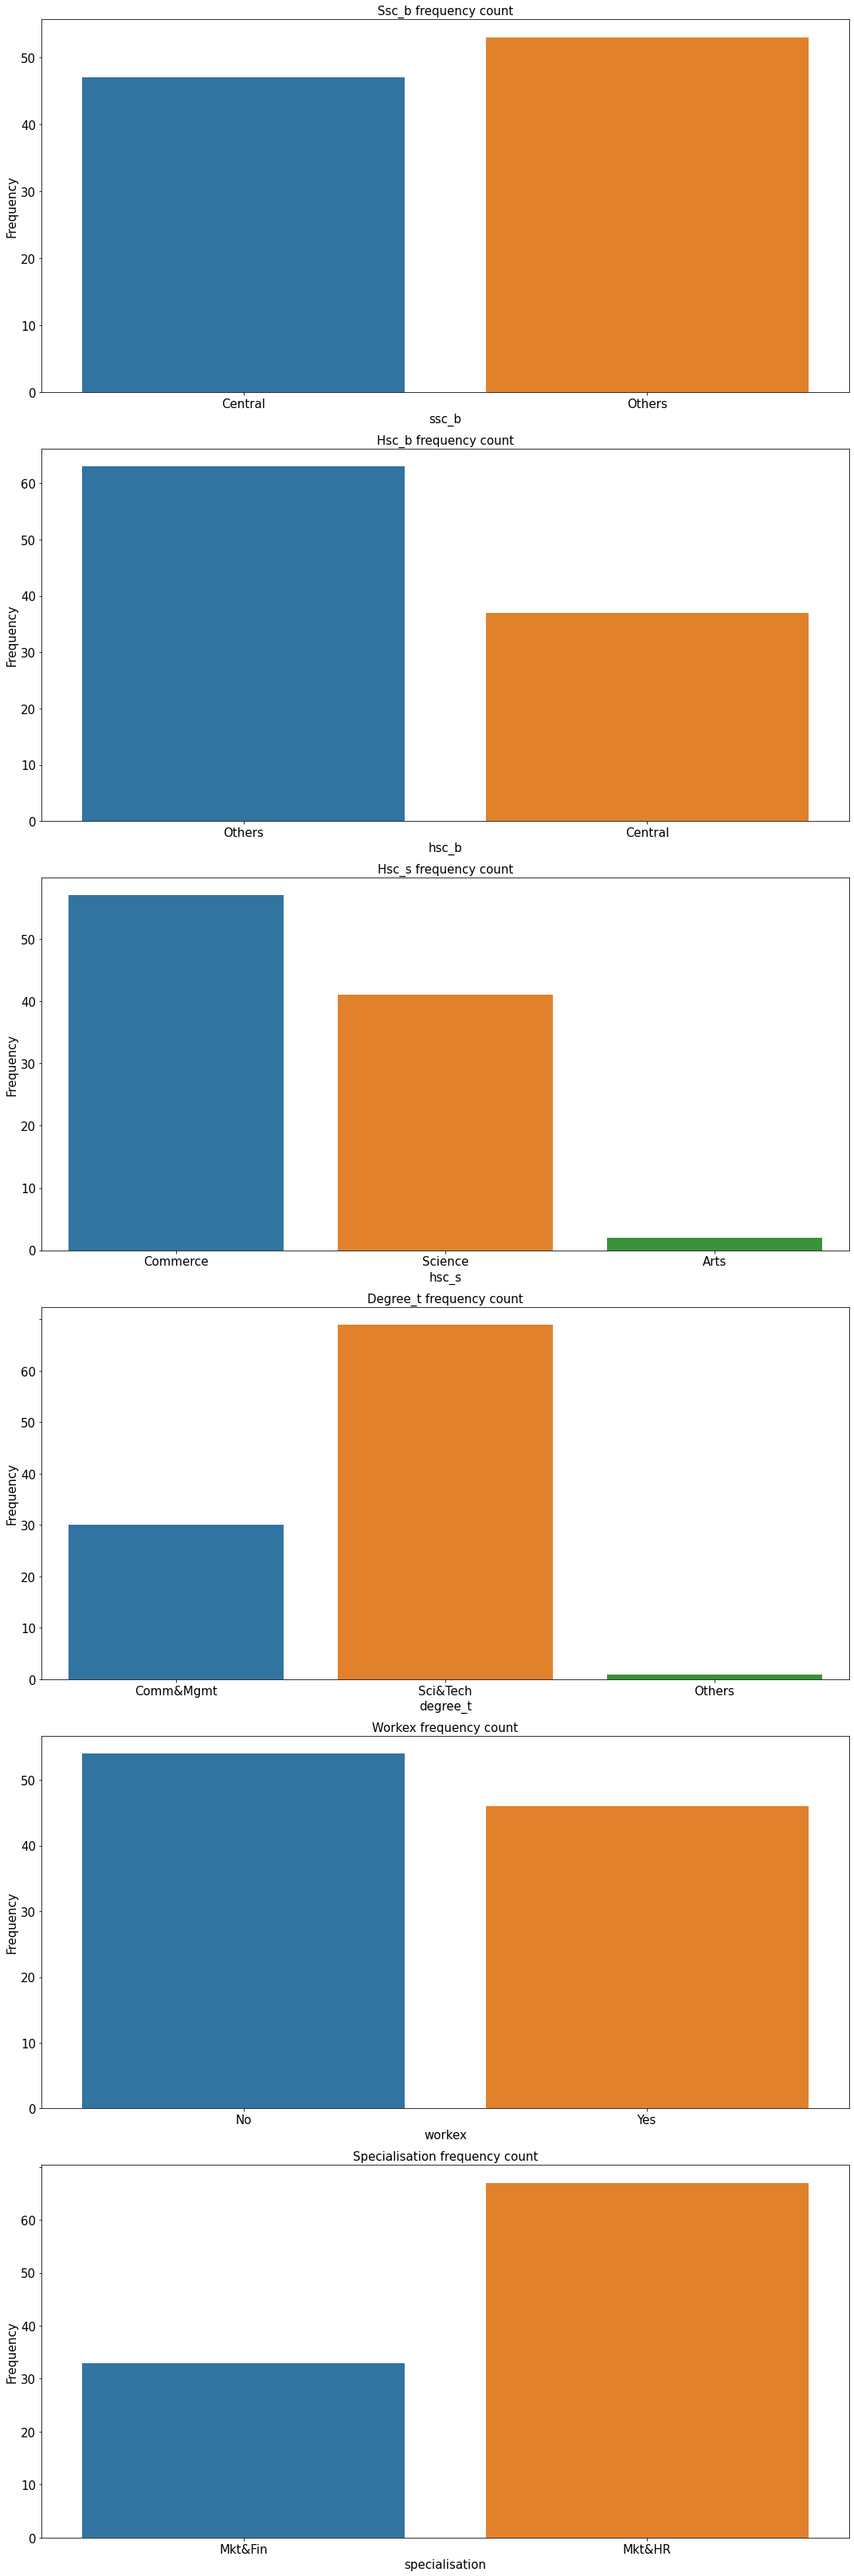

In [155]:
usual_countplots(placed_male, ['ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'])

In [129]:
for i in ['ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']:
    print(placed_male[i].value_counts())

Central    53
Others     47
Name: ssc_b, dtype: int64
Others     63
Central    37
Name: hsc_b, dtype: int64
Commerce    57
Science     41
Arts         2
Name: hsc_s, dtype: int64
Comm&Mgmt    69
Sci&Tech     30
Others        1
Name: degree_t, dtype: int64
No     54
Yes    46
Name: workex, dtype: int64
Mkt&Fin    67
Mkt&HR     33
Name: specialisation, dtype: int64


In [ ]:
# countplots for placed male students

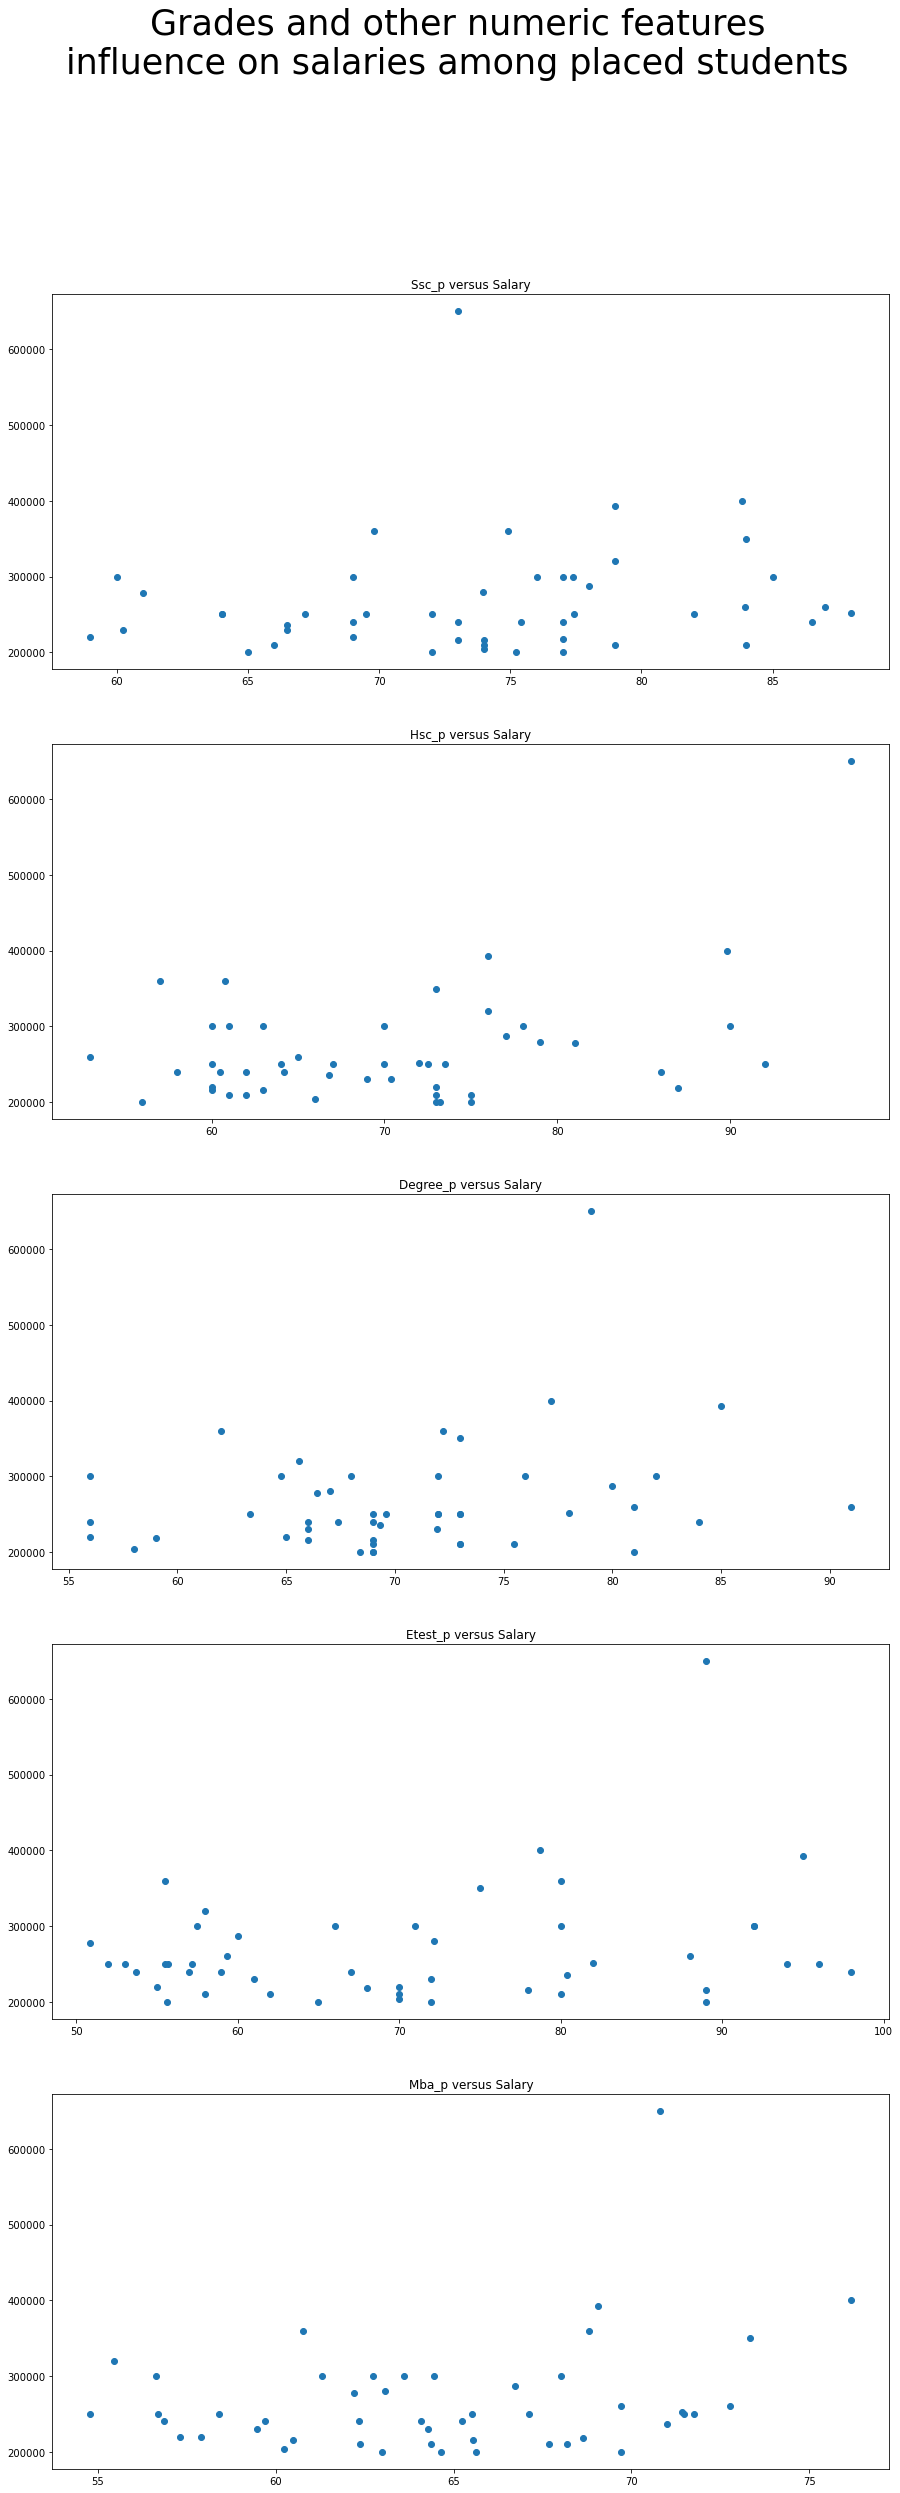

In [149]:
scat(placed_female,data,target)

In [150]:
# general scatterplots for placed female students

In [152]:
# general data for female placed students
placed_female.describe()

sl_no      ssc_p      hsc_p   degree_p    etest_p      mba_p  \
count   48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
mean    99.979167  73.922708  70.244375  70.596875  70.734167  64.617292   
std     56.758349   7.534861  10.258398   7.694800  14.106219   5.250594   
min     14.000000  59.000000  53.000000  56.000000  50.890000  54.800000   
25%     44.000000  69.000000  61.750000  66.000000  57.875000  60.710000   
50%     98.000000  74.000000  70.000000  69.150000  70.000000  64.400000   
75%    135.250000  78.250000  75.250000  73.625000  80.100000  68.675000   
max    214.000000  88.000000  97.000000  91.000000  98.000000  76.180000   

              salary  
count      48.000000  
mean   267291.666667  
std     75948.178955  
min    200000.000000  
25%    219500.000000  
50%    250000.000000  
75%    300000.000000  
max    650000.000000

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-143-6e79b2205886>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[j].value_counts().index, Fontsize = 15)
<ipython-input-143-6e79b2205886>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fontsize = 15)
<ipython-input-143-6e79b2205886>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fon

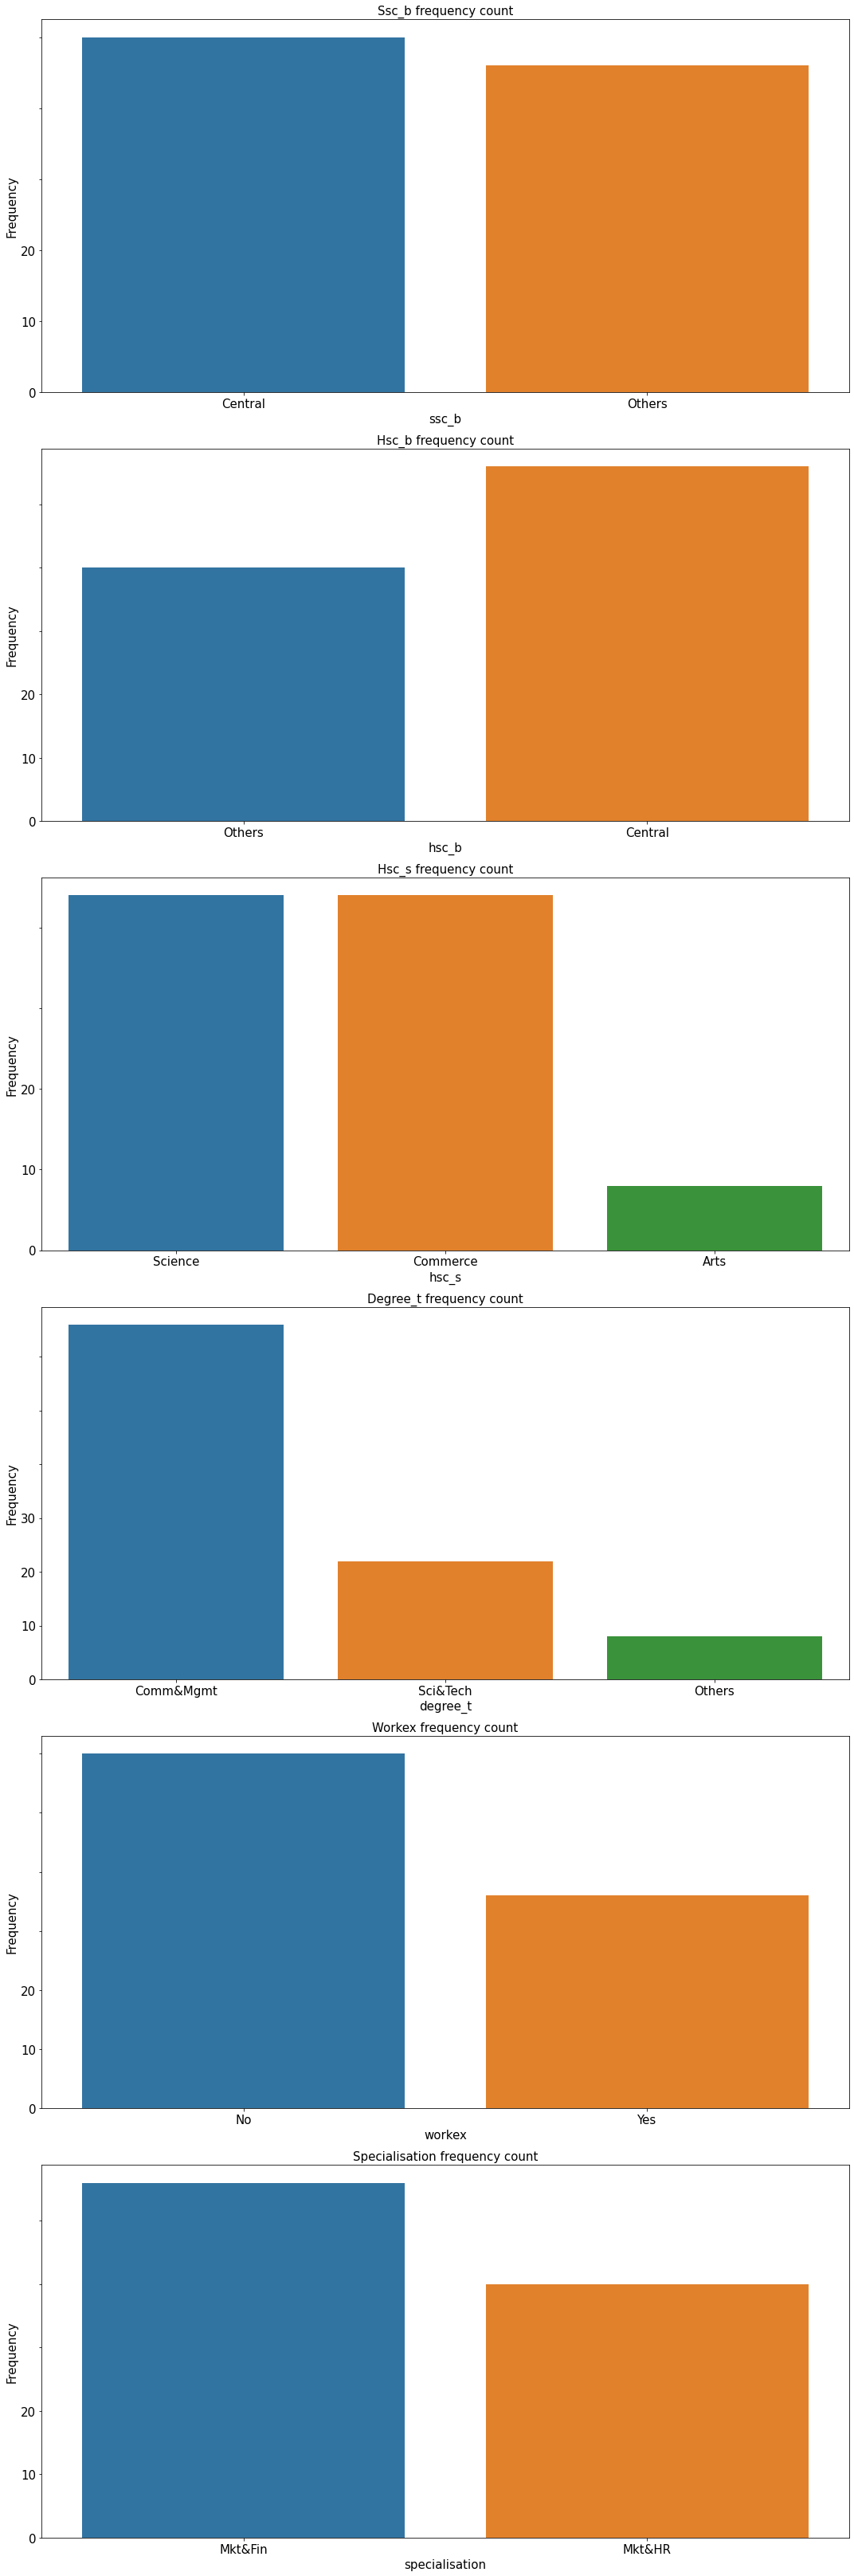

In [154]:
usual_countplots(placed_female,['ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'])

In [153]:
for i in ['ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']:
    print(placed_female[i].value_counts())

Central    25
Others     23
Name: ssc_b, dtype: int64
Others     28
Central    20
Name: hsc_b, dtype: int64
Science     22
Commerce    22
Arts         4
Name: hsc_s, dtype: int64
Comm&Mgmt    33
Sci&Tech     11
Others        4
Name: degree_t, dtype: int64
No     30
Yes    18
Name: workex, dtype: int64
Mkt&Fin    28
Mkt&HR     20
Name: specialisation, dtype: int64


C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

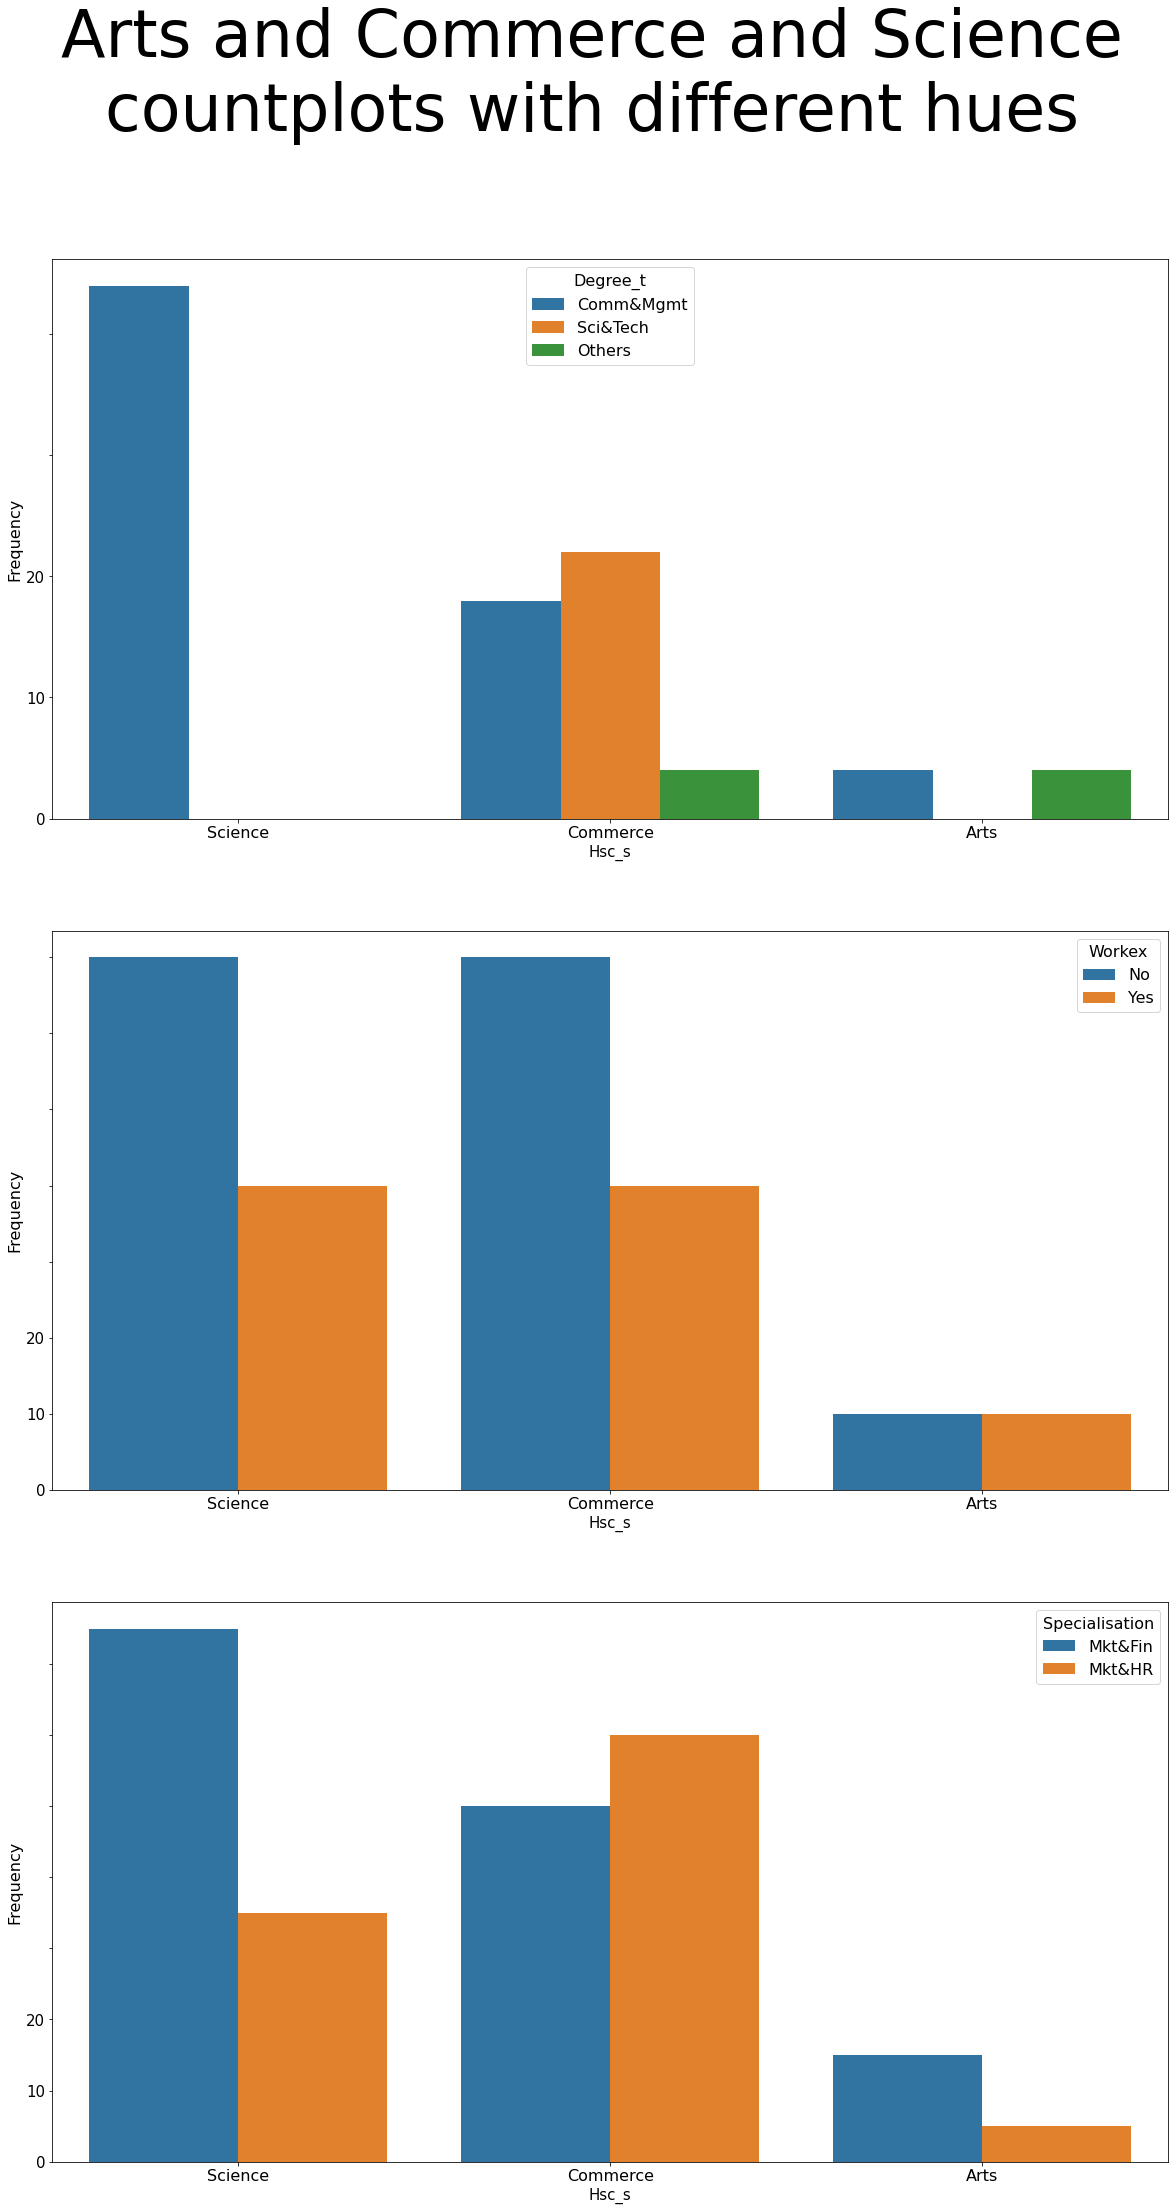

In [156]:
plot(placed_female,['degree_t','workex','specialisation'],'hsc_s','Placed female students')

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

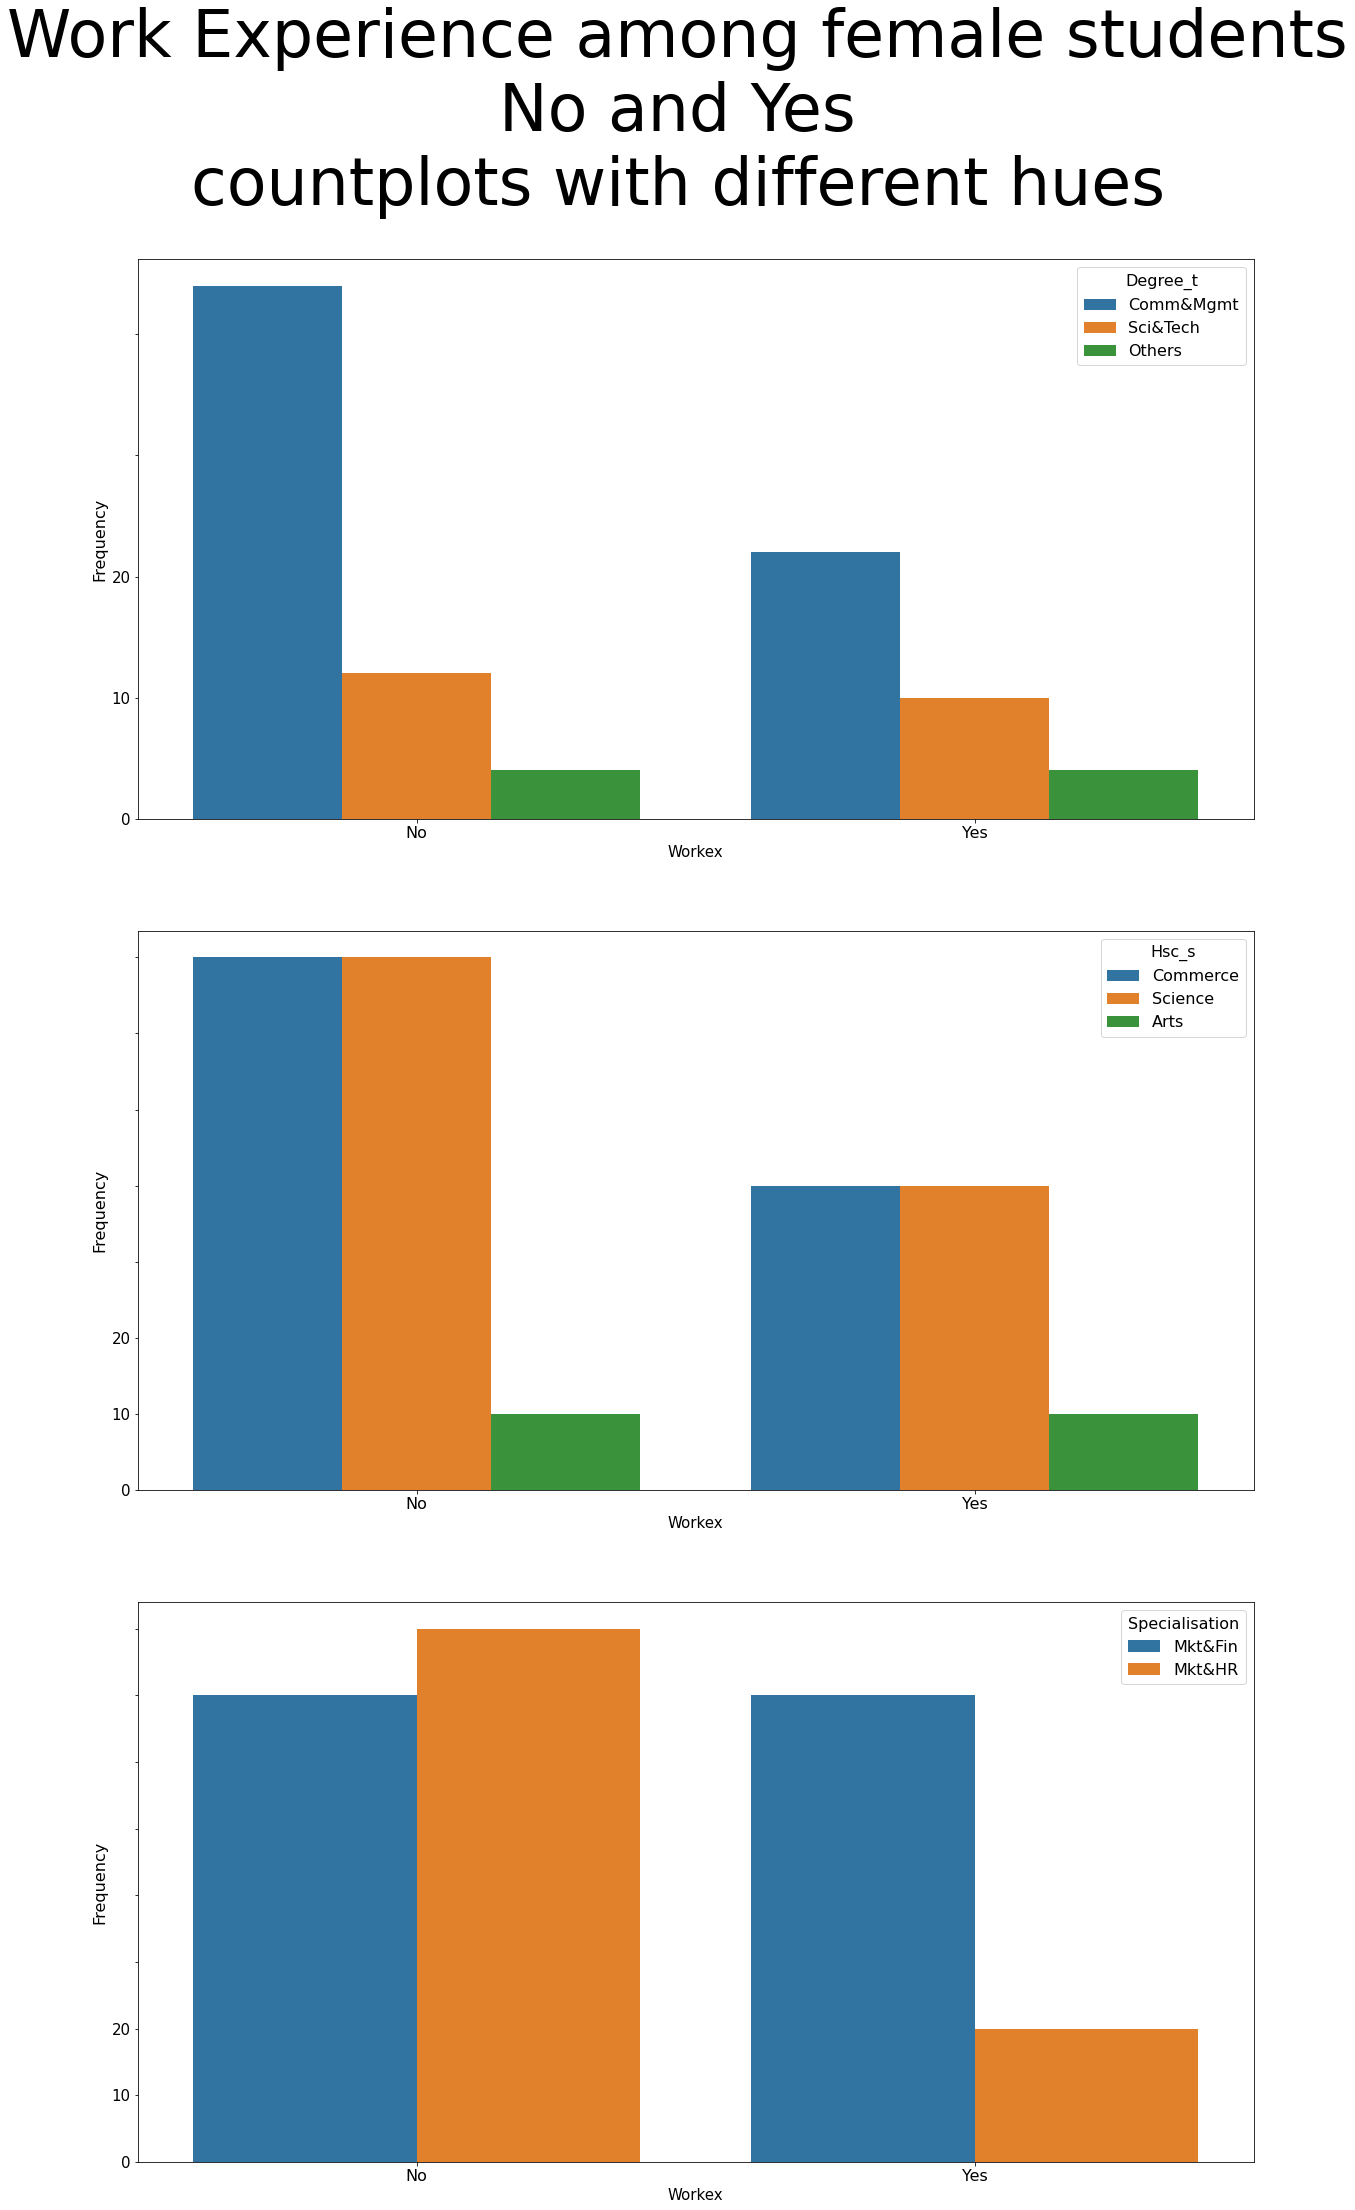

In [161]:
plot(placed_female,['degree_t','hsc_s','specialisation'],'workex','Work Experience among female students\n')

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

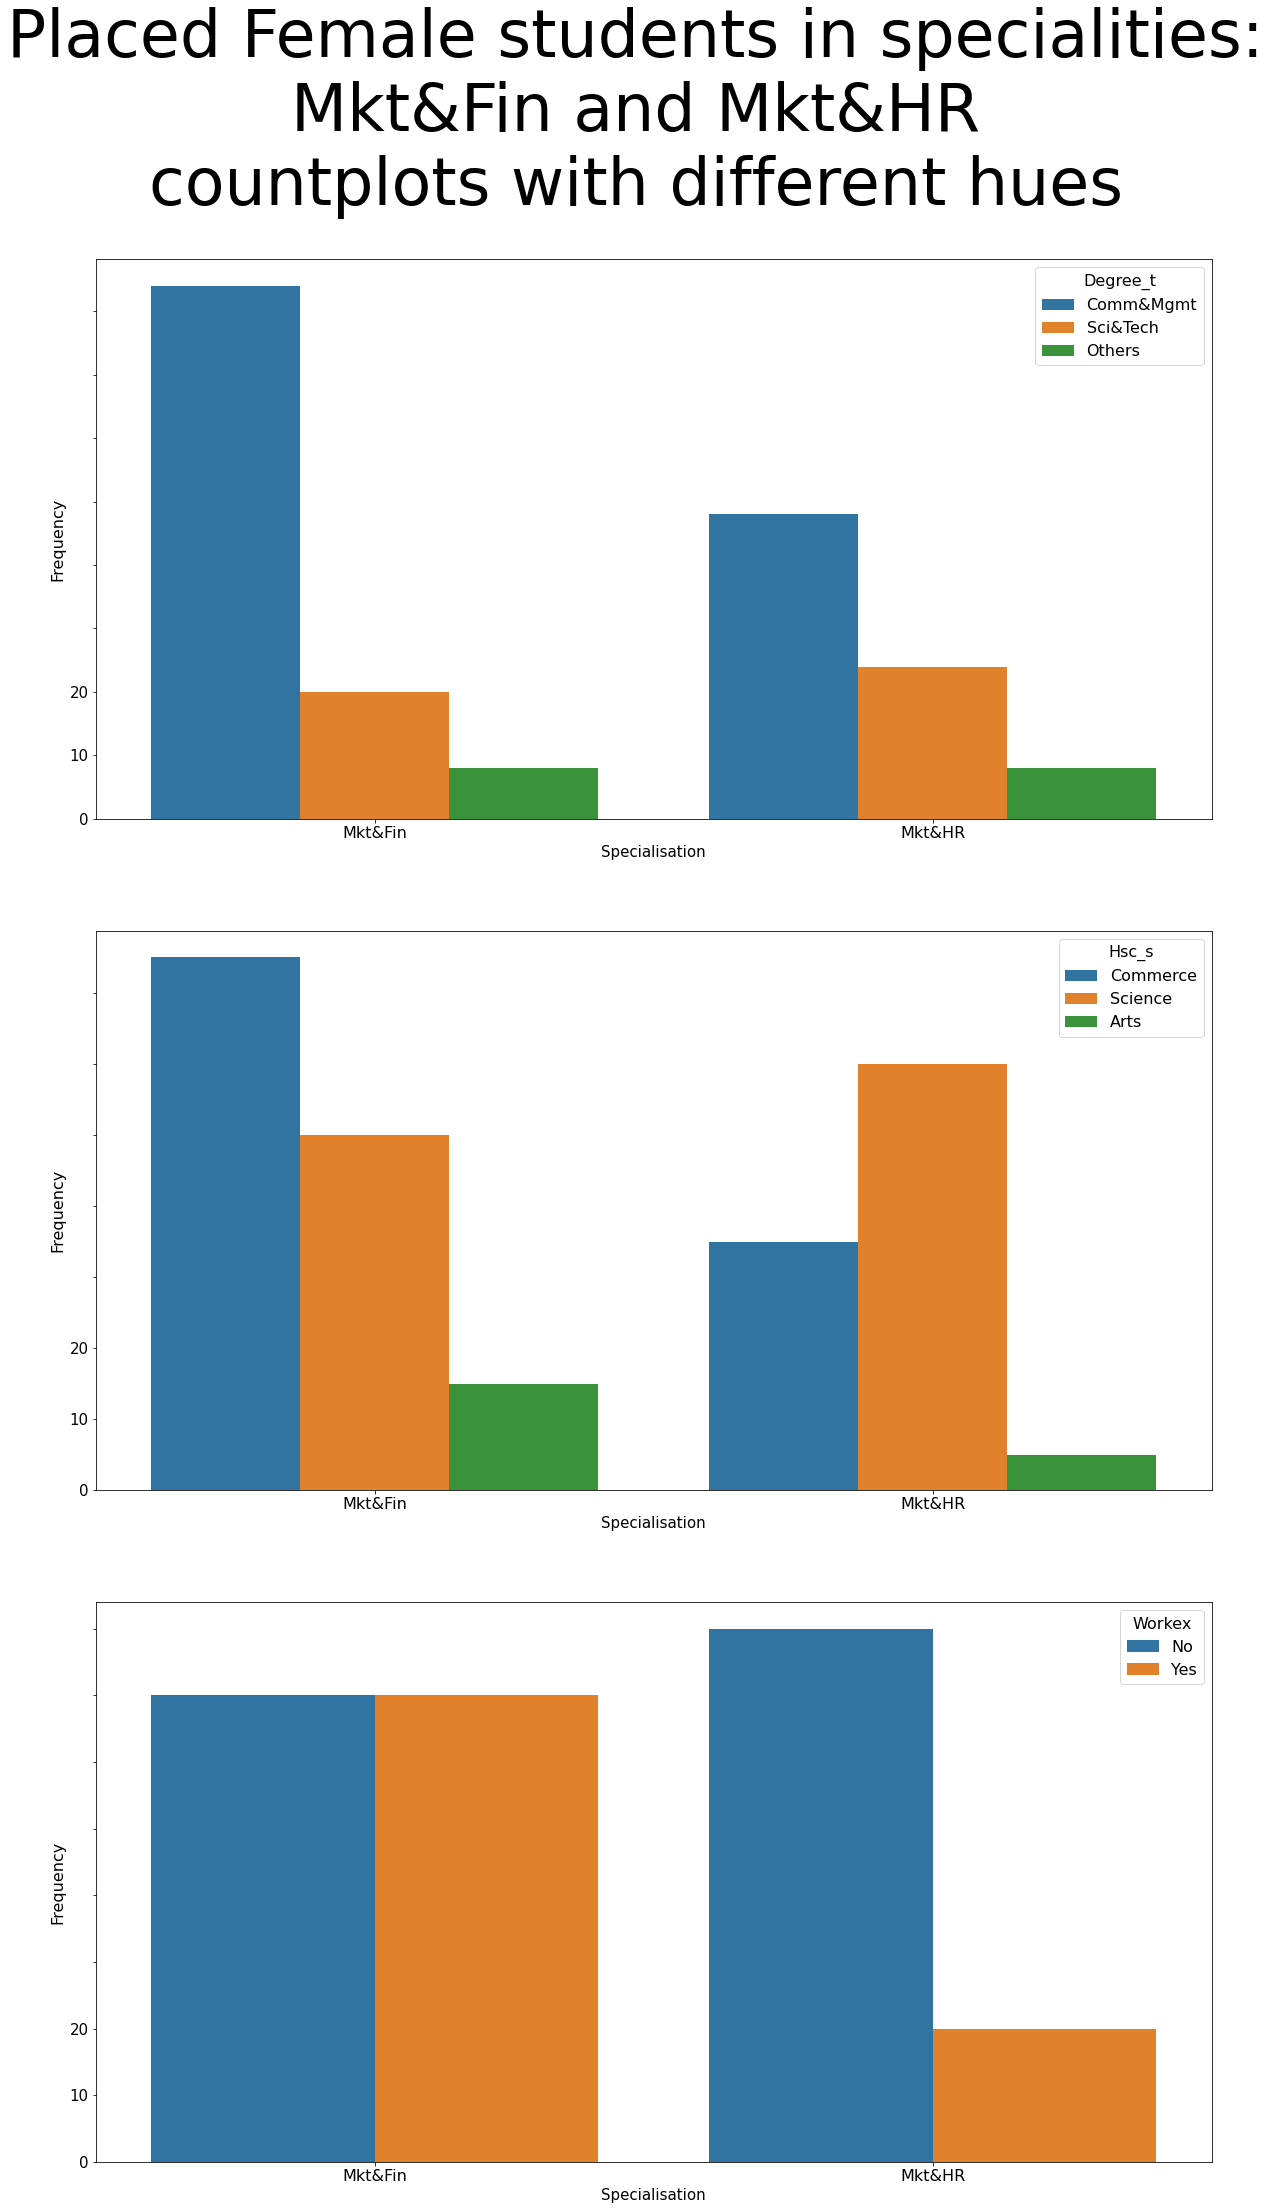

In [162]:
plot(placed_female,['degree_t','hsc_s','workex'],'specialisation','Placed Female students in specialities:\n')

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-146-110f8f8bb3f5>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-146-110f8f8bb3f5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-146-110f8f8bb3f5>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0]

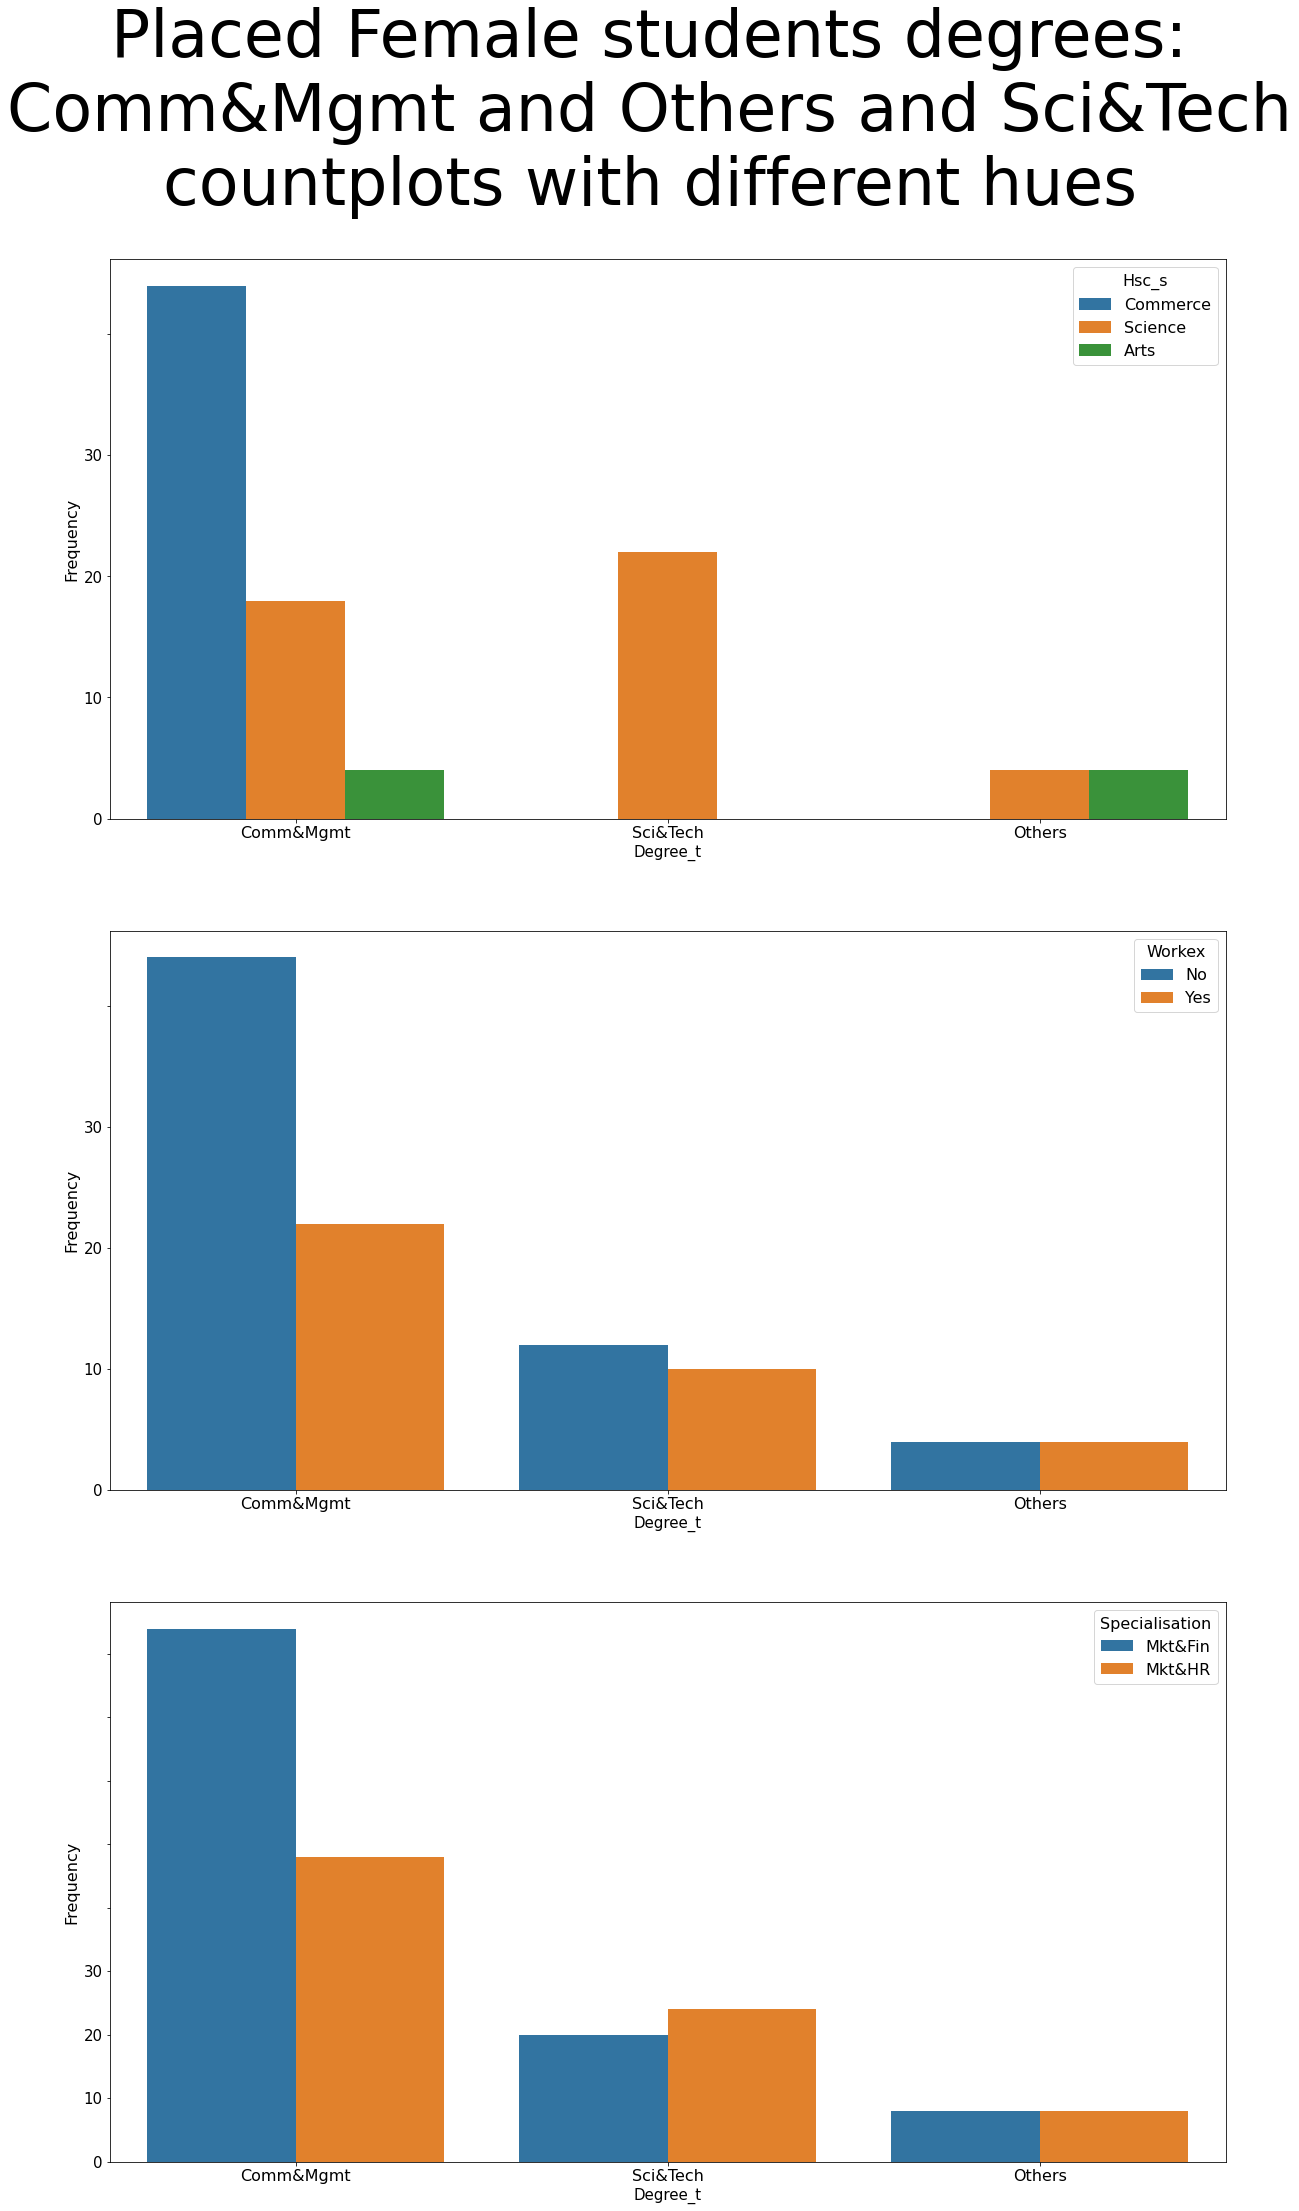

In [163]:
plot(placed_female,['hsc_s','workex','specialisation'],'degree_t','Placed Female students degrees:\n')

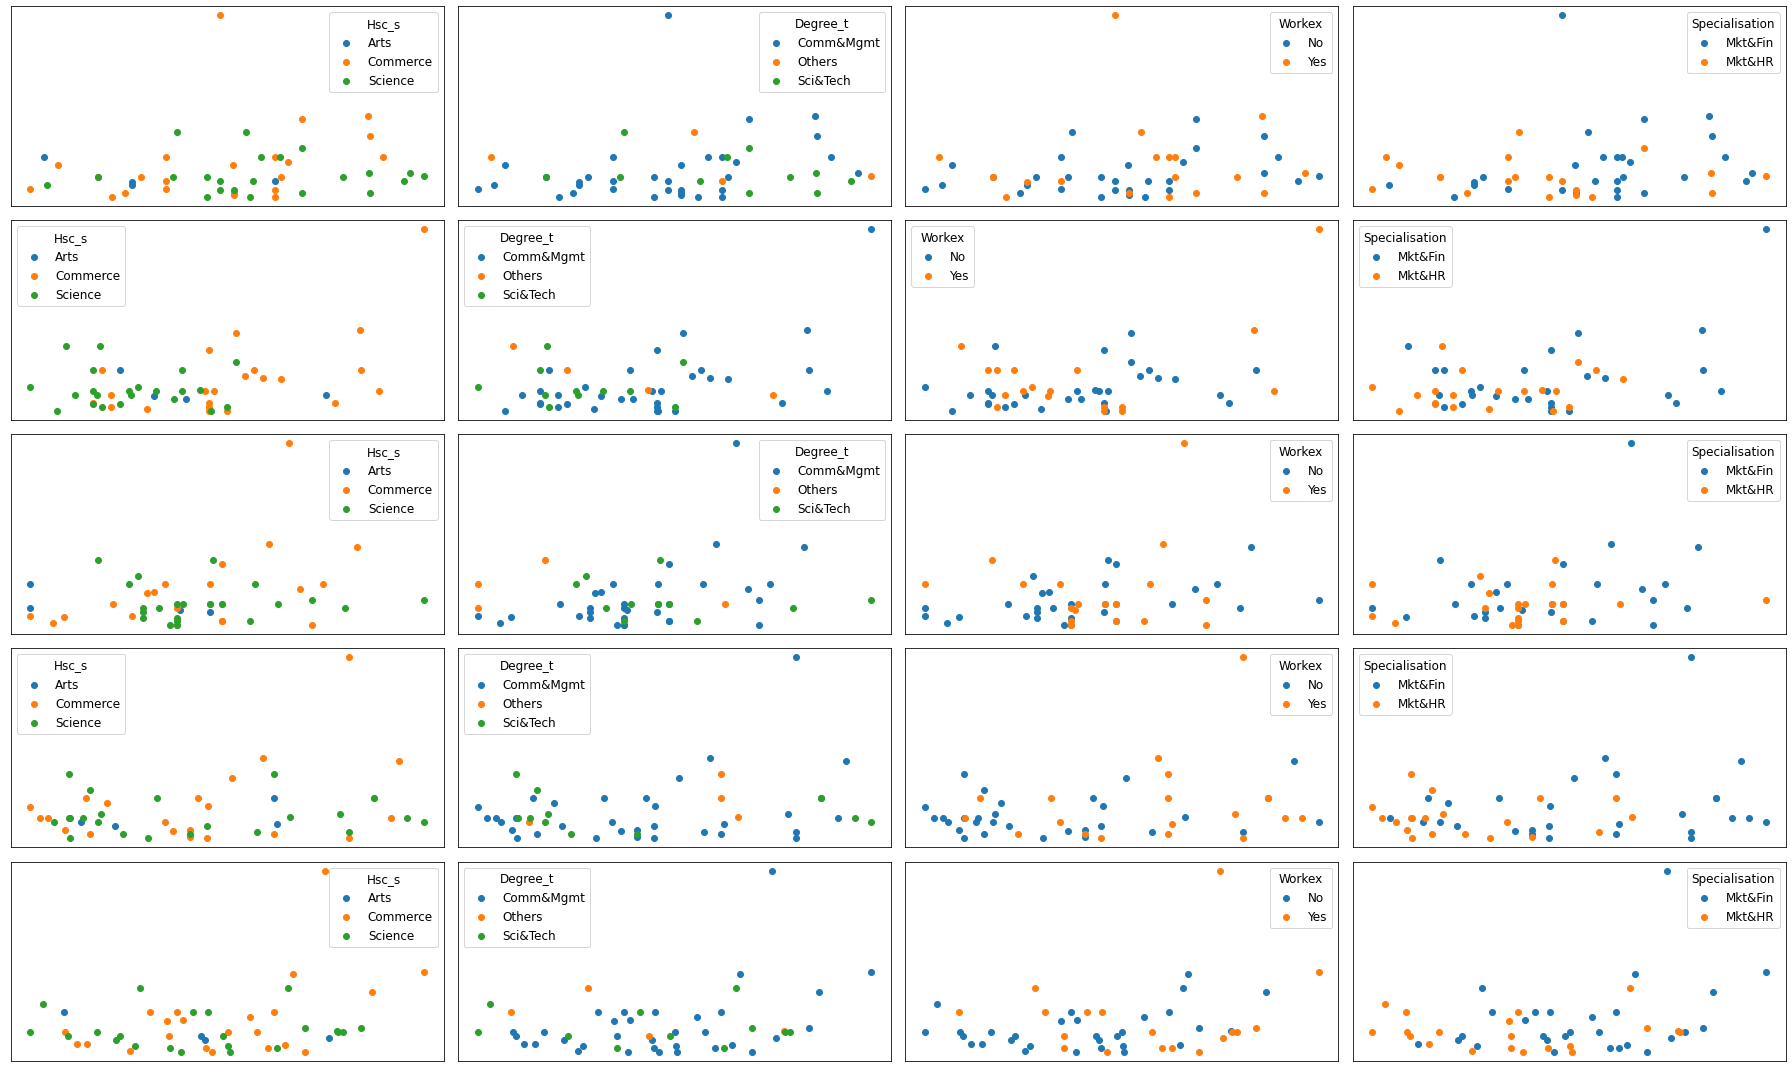

In [168]:
scat_class(placed_female,data,'salary',['hsc_s','degree_t','workex','specialisation'])

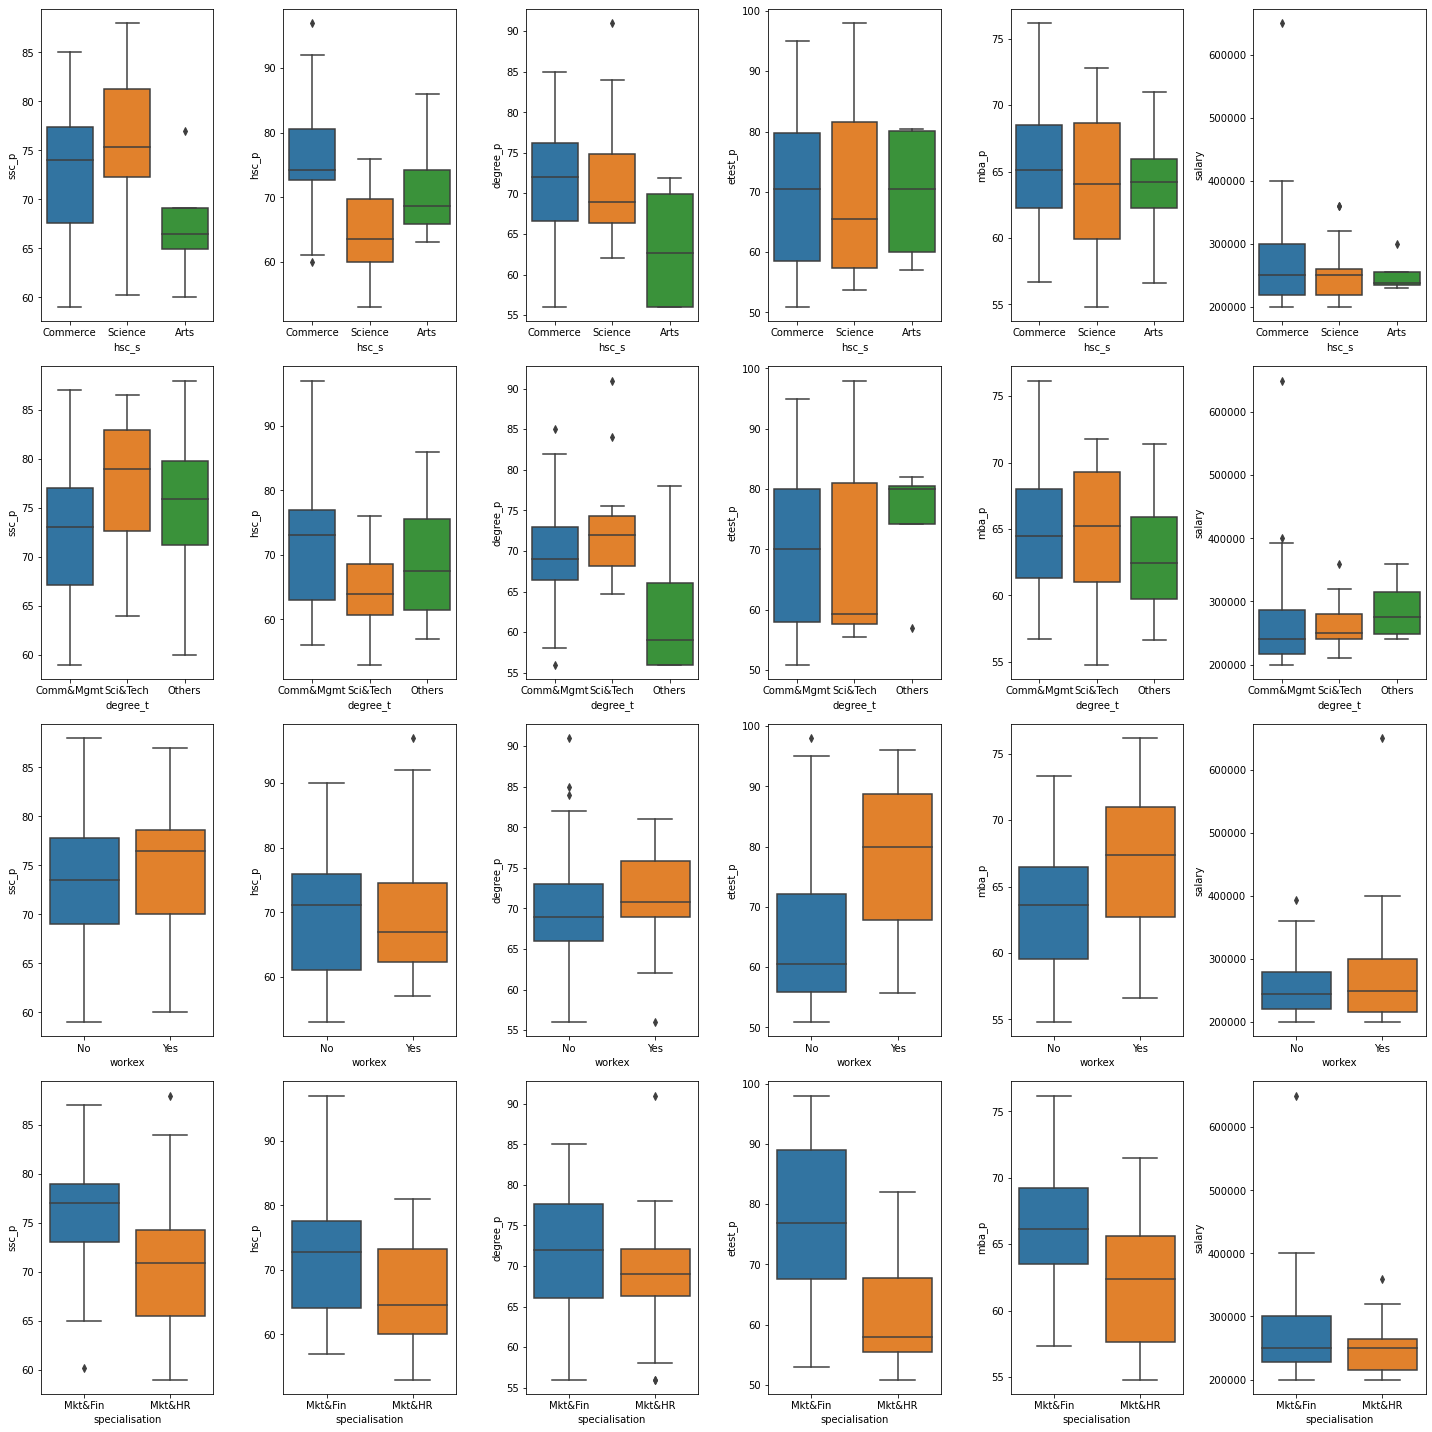

In [169]:
boxplots(placed_female,['hsc_s','degree_t','workex','specialisation'],['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary'])

In [198]:
#data preparation for all genders. Linear models for predicting expected salary
def detailed_dataset(df,hsc_s,degree_t,workex,spec):
    df_hsc = df[df['hsc_s'] == hsc_s]
    df_hsc_deg = df_hsc[df_hsc['degree_t'] == degree_t]
    df_hsc_deg_exp = df_hsc_deg[df_hsc_deg['workex'] == workex]
    df_hsc_deg_exp_spec = df_hsc_deg_exp[df_hsc_deg_exp['specialisation'] == spec]
    return df_hsc_deg_exp_spec

In [233]:
placed = placed.drop(['sl_no'], axis = 1)

In [235]:
def df_detail(df):
    detailed_datasets = []
    for i in np.unique(df['hsc_s']):
        for j in np.unique(df['degree_t']):
            for s in np.unique(df['workex']):
                for n in np.unique(df['specialisation']):
                    detailed_datasets.append(detailed_dataset(placed,i,j,s,n))
    return detailed_datasets

In [236]:
det = df_detail(placed)

In [237]:
len(det)

36

In [238]:
def popping(dfs):
    to_pop = []
    for i in range(len(dfs)):
        if dfs[i].shape[0] == 0:
            to_pop.append(i)
    if len(to_pop) == 0:
        return 'empty'
    to_remove = to_pop[0]
    dfs.pop(to_remove)
    return dfs

In [239]:
flag = True
while flag:
    if popping(det) == 'empty':
        break
    popping(det)

In [240]:
len(detailed_datasets)

20

In [364]:
def reg_models(model,df,data,target,scatter_x):
    x = df.drop(['status',target], axis = 1).values
    y = df[target].values
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)
    ml = model.fit(x_train,y_train)
    y_pred = ml.predict(x)
    mae = mean_absolute_error(y,y_pred)
    mse = mean_squared_error(y_pred,y)
    r2 = r2_score(y_pred,y)
    rmse = np.sqrt(mean_squared_error(y_pred,y))
    fig, axes = plt.subplots(nrows = 1,ncols = len(data), figsize = (20,5))
    for i,j in enumerate(scatter_x):
        axes[i].scatter(x[:,j],y_pred, color = 'b')
        axes[i].set_xlabel(df.columns[j])
        axes[i].set_ylabel(target)
        axes[i].set_xticklabels(())
        axes[i].set_yticklabels(())
    plt.suptitle(model)
    plt.tight_layout()
    plt.show()
    scores = ['Mean Absolute Error','Mean Squared Error','r2 score','Root Mean Squared Error']
    metr = pd.Series([mae,mse,r2,rmse], index = scores)
    return metr

In [461]:
def class_models(model,df,data,target,non_df):
    le = LabelEncoder()
    le.fit(non_df['status'])
    colors = ['red','yellow']
    x = df.drop(['salary'], axis = 1).values
    y = df.loc[:,target].values
    x_train, x_test, y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)
    ml = model.fit(x_train,y_train)
    y_pred = ml.predict(x)
    accuracy = accuracy_score(y_pred,y)
    f1 = f1_score(y_pred,y)
    an, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.set_xticklabels(())
    ax.set_yticklabels(())
    cm = sns.heatmap(confusion_matrix(y_pred,y), annot = True, ax = ax)
    plt.title(model)
    fig, axes = plt.subplots(nrows = 1, ncols = len(data), figsize = (15,4))
    for i,j in enumerate(data):
        for z,c in enumerate(np.unique(y_pred)):
            axes[i].scatter(x[y_pred == c,1],x[y_pred == c,3], color = colors[z])
        axes[i].set_xlabel(df.columns[1])
        axes[i].set_ylabel(df.columns[3])
        axes[i].legend(le.inverse_transform(np.unique(y_pred)),loc = 'best').set_title(target)
    plt.suptitle(model)
    plt.tight_layout()
    plt.show()
    cols = ['accuracy_score','f1_score']
    scores = pd.Series([accuracy,f1], index = cols)
    return scores

In [310]:
# linear models
lr = LinearRegression()
rr = Ridge(alpha = 0.01)
rrcv = RidgeCV(alphas = np.logspace(-6,0,15))
lgr = LogisticRegression()
rfr = RandomForestRegressor()
svr = SVR()

In [401]:
lin_models = [lr,rr,rrcv,rfr,svr]

In [414]:
# classification models
mnb = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors = 3)
rfc = RandomForestClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()

In [420]:
class_modelz = [mnb,knn,rfc,svc,dtc,lgr,gnb]

In [358]:
encoded_placed = encoded_placed.drop(['sl_no'], axis = 1)

In [383]:
perc = np.percentile(encoded_placed['salary'],[0,25,50,75,100])
iqr = perc[3] - perc[1]
salMin = perc[1] - iqr*1.5
salMax = perc[3] + iqr*1.5

In [394]:
outliers = encoded_placed.loc[(encoded_placed['salary'].values < salMin) | (encoded_placed['salary'].values > salMax)]
outliers

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
4         1  85.80      0  73.60      0      1     73.30         0       0   
21        0  79.00      1  76.00      1      1     85.00         0       0   
39        1  81.00      1  68.00      1      2     64.00         2       0   
53        1  80.00      1  70.00      1      2     72.00         2       0   
77        1  64.00      1  80.00      1      2     65.00         2       1   
85        0  83.84      1  89.83      1      1     77.20         0       1   
95        1  73.00      0  78.00      1      1     65.00         0       1   
119       1  60.80      0  68.40      0      1     64.60         0       1   
128       1  80.40      0  73.40      0      2     77.72         2       1   
145       1  89.40      1  65.66      1      2     71.25         2       0   
150       1  71.00      0  58.66      0      2     58.00         2       1   
163       1  63.00      1  67.00      1      2     64.00         2       0   
174       1  73.24      1  50.83      1      2     64.27         2       1   
177       0  73.00      0  97.00      1      1     79.00         0       1   
210       1  80.60      1  82.00      1      1     77.60         0       0   

     etest_p  specialisation  mba_p  status    salary  
4      96.80               0  55.50       1  425000.0  
21     95.00               0  69.06       1  393000.0  
39     93.00               0  62.56       1  411000.0  
53     87.00               1  71.04       1  450000.0  
77     69.00               0  57.65       1  500000.0  
85     78.74               0  76.18       1  400000.0  
95     95.46               0  62.16       1  420000.0  
119    82.66               0  64.34       1  940000.0  
128    81.20               1  76.26       1  400000.0  
145    72.00               1  63.23       1  400000.0  
150    56.00               0  61.30       1  690000.0  
163    75.00               0  66.46       1  500000.0  
174    64.00               0  66.23       1  500000.0  
177    89.00               0  70.81       1  650000.0  
210    91.00               0  74.49       1  400000.0

In [406]:
outliers.loc[:,'salary'] = np.mean(encoded_placed['salary'])
outliers

C:\Users\User2-NB\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
4         1  85.80      0  73.60      0      1     73.30         0       0   
21        0  79.00      1  76.00      1      1     85.00         0       0   
39        1  81.00      1  68.00      1      2     64.00         2       0   
53        1  80.00      1  70.00      1      2     72.00         2       0   
77        1  64.00      1  80.00      1      2     65.00         2       1   
85        0  83.84      1  89.83      1      1     77.20         0       1   
95        1  73.00      0  78.00      1      1     65.00         0       1   
119       1  60.80      0  68.40      0      1     64.60         0       1   
128       1  80.40      0  73.40      0      2     77.72         2       1   
145       1  89.40      1  65.66      1      2     71.25         2       0   
150       1  71.00      0  58.66      0      2     58.00         2       1   
163       1  63.00      1  67.00      1      2     64.00         2       0   
174       1  73.24      1  50.83      1      2     64.27         2       1   
177       0  73.00      0  97.00      1      1     79.00         0       1   
210       1  80.60      1  82.00      1      1     77.60         0       0   

     etest_p  specialisation  mba_p  status         salary  
4      96.80               0  55.50       1  288655.405405  
21     95.00               0  69.06       1  288655.405405  
39     93.00               0  62.56       1  288655.405405  
53     87.00               1  71.04       1  288655.405405  
77     69.00               0  57.65       1  288655.405405  
85     78.74               0  76.18       1  288655.405405  
95     95.46               0  62.16       1  288655.405405  
119    82.66               0  64.34       1  288655.405405  
128    81.20               1  76.26       1  288655.405405  
145    72.00               1  63.23       1  288655.405405  
150    56.00               0  61.30       1  288655.405405  
163    75.00               0  66.46       1  288655.405405  
174    64.00               0  66.23       1  288655.405405  
177    89.00               0  70.81       1  288655.405405  
210    91.00               0  74.49       1  288655.405405

In [407]:
encoded_placed.loc[outliers.index,'salary'] = outliers['salary']

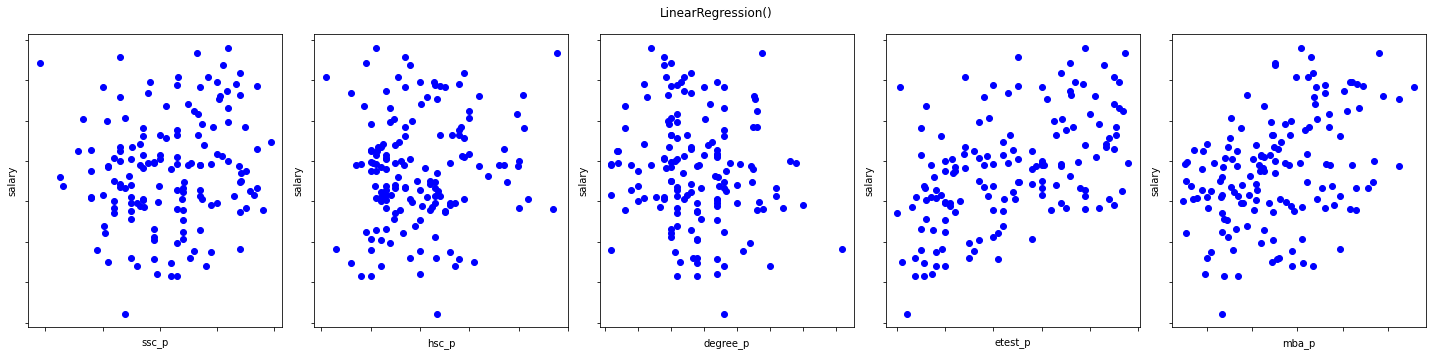

Mean Absolute Error        2.873750e+04
Mean Squared Error         1.382804e+09
r2 score                  -6.578373e+00
Root Mean Squared Error    3.718607e+04
dtype: float64


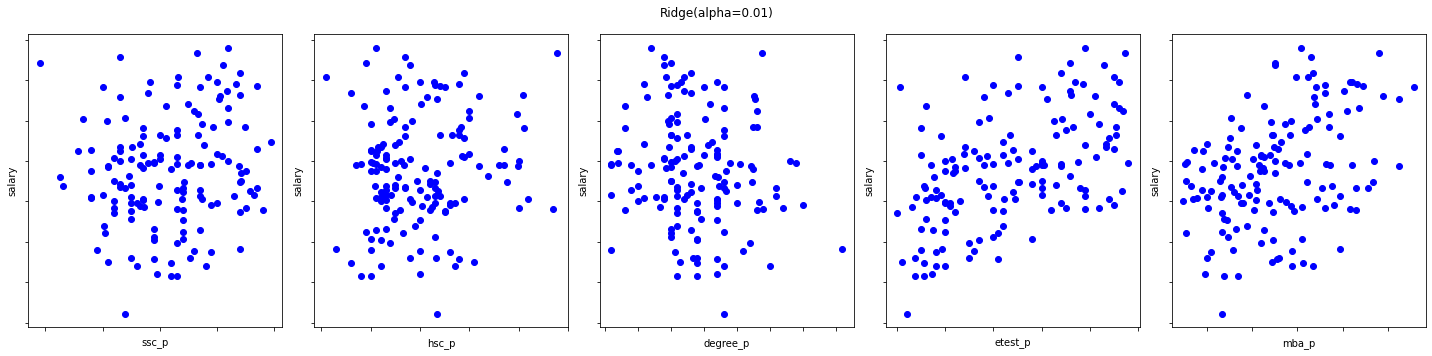

Mean Absolute Error        2.873754e+04
Mean Squared Error         1.382806e+09
r2 score                  -6.581101e+00
Root Mean Squared Error    3.718610e+04
dtype: float64


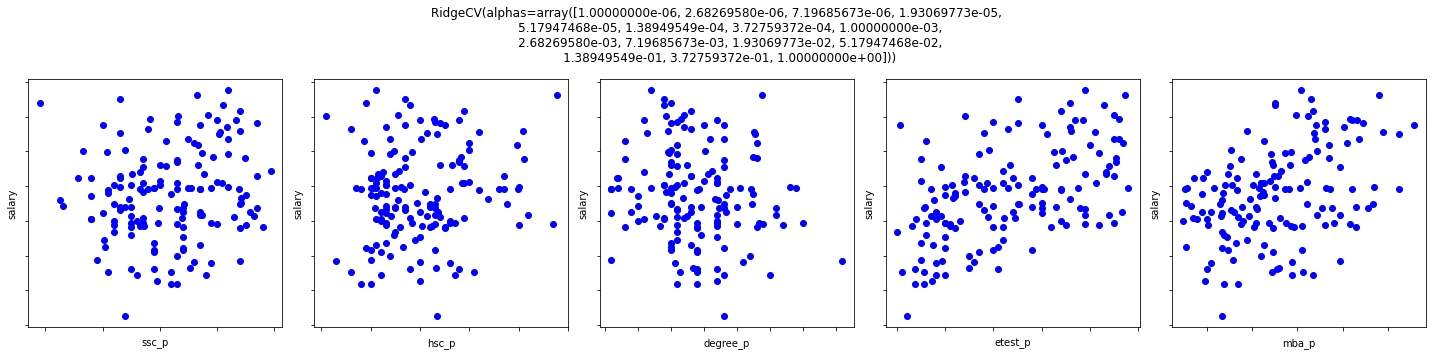

Mean Absolute Error        2.874226e+04
Mean Squared Error         1.383110e+09
r2 score                  -6.841679e+00
Root Mean Squared Error    3.719018e+04
dtype: float64


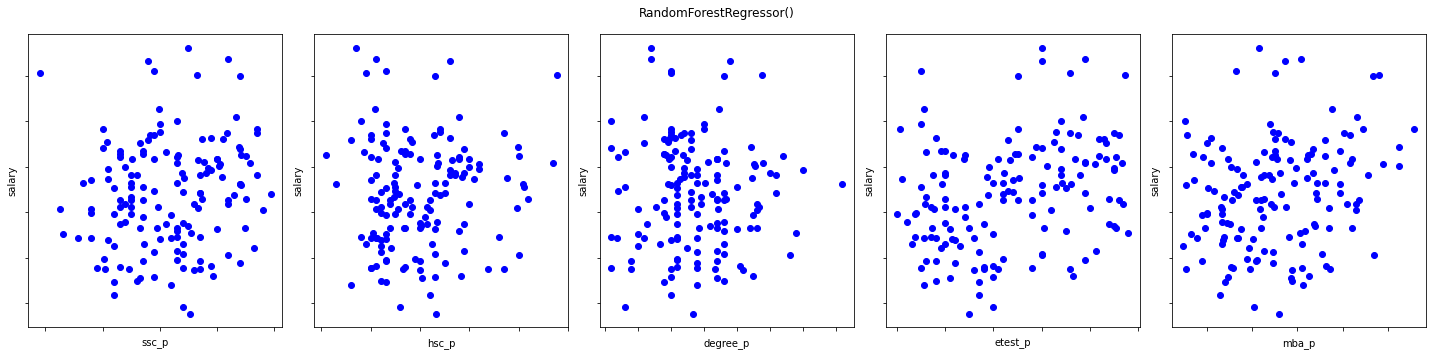

Mean Absolute Error        1.530414e+04
Mean Squared Error         5.564600e+08
r2 score                   8.082137e-03
Root Mean Squared Error    2.358940e+04
dtype: float64


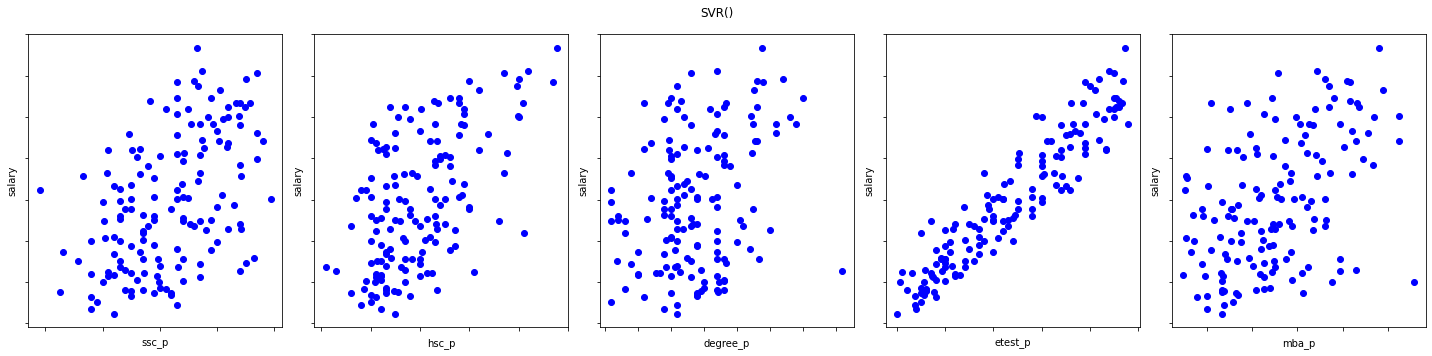

Mean Absolute Error        3.141758e+04
Mean Squared Error         1.557772e+09
r2 score                  -2.456615e+09
Root Mean Squared Error    3.946862e+04
dtype: float64


In [408]:
#modelling
for i in lin_models:
    print(reg_models(i,encoded_placed,data,target,[1,3,6,9,11]))

In [418]:
df_enc.drop(['sl_no'], axis = 1, inplace = True)

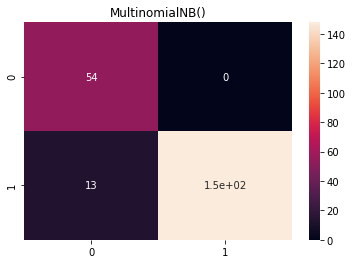

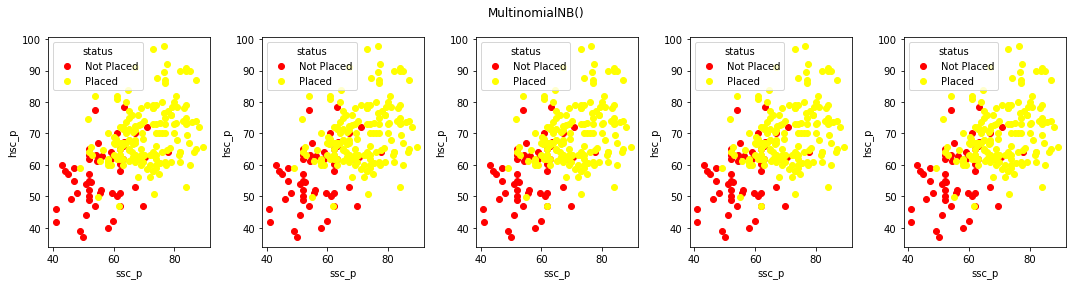

accuracy_score    0.939535
f1_score          0.957929
dtype: float64


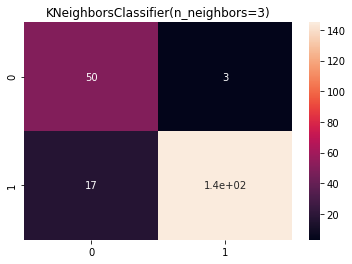

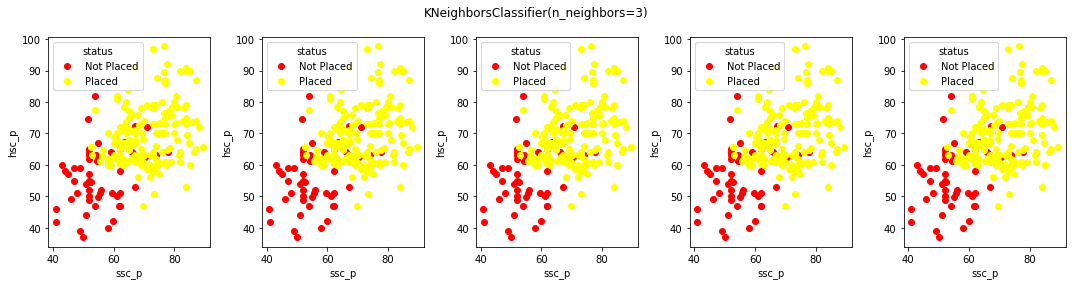

accuracy_score    0.906977
f1_score          0.935484
dtype: float64


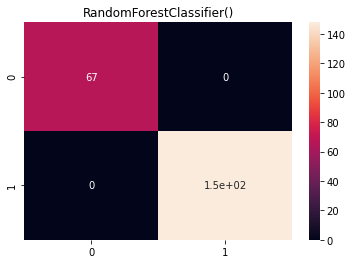

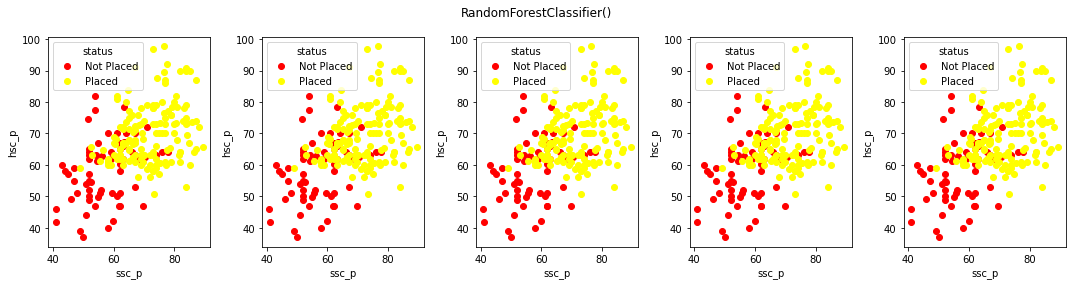

accuracy_score    1.0
f1_score          1.0
dtype: float64


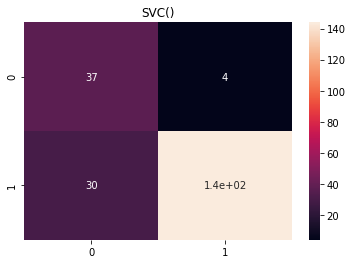

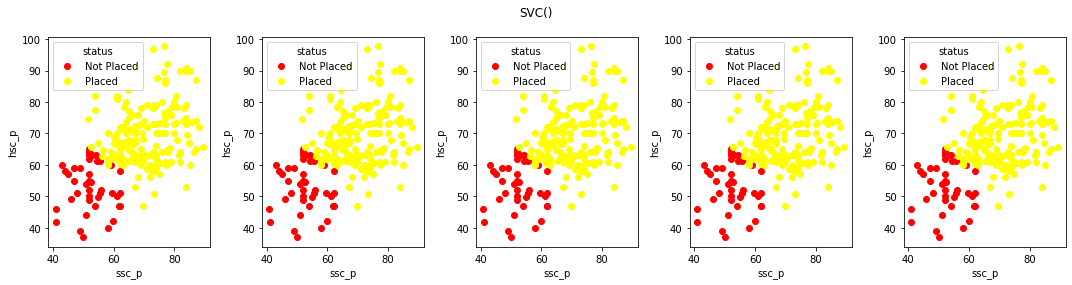

accuracy_score    0.84186
f1_score          0.89441
dtype: float64


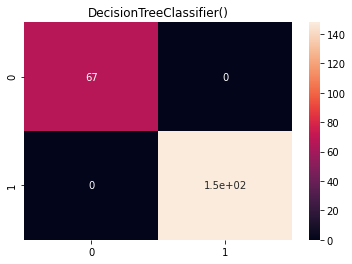

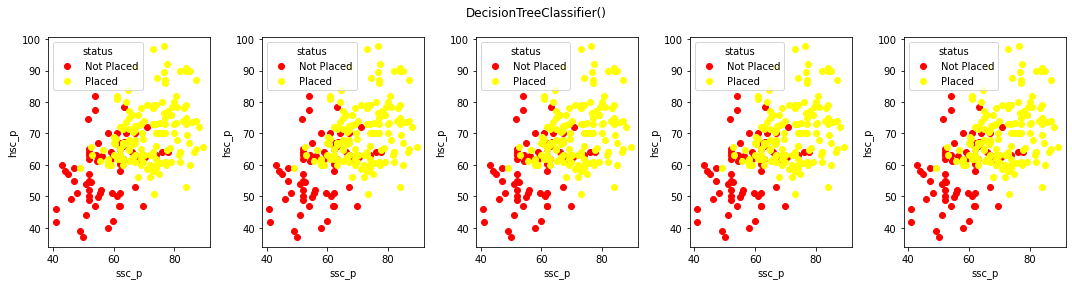

accuracy_score    1.0
f1_score          1.0
dtype: float64


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


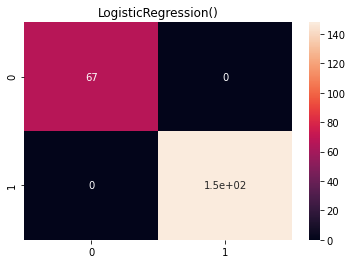

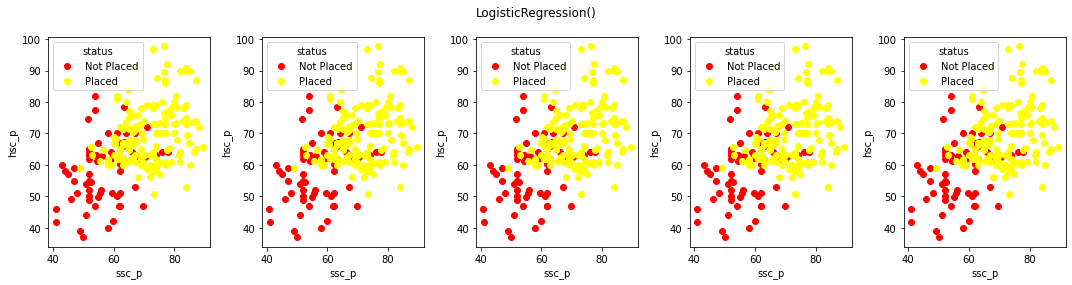

accuracy_score    1.0
f1_score          1.0
dtype: float64


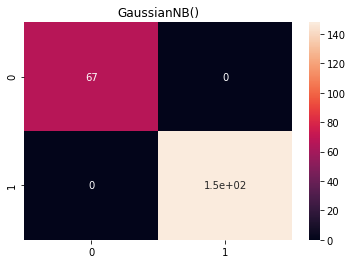

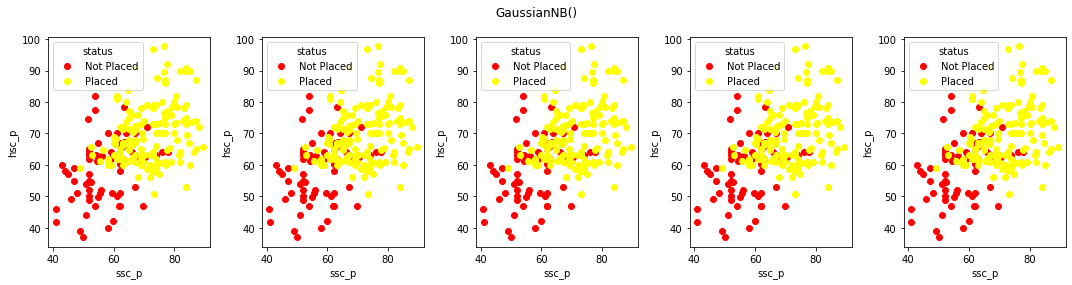

accuracy_score    1.0
f1_score          1.0
dtype: float64


In [462]:
for i in class_modelz:
    print(class_models(i,df_enc,[1,3,6,9,11],'status',df))

In [458]:
ten = LabelEncoder()
ten.fit(df['status'])
ten.inverse_transform([0])

array(['Not Placed'], dtype=object)

In [473]:
import pickle

In [474]:
# train and save models
def linear(model,df,target,i):
    x = df.drop(['status',target], axis = 1).values
    y = df[target].values
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)
    model_name = str(i) + 'model.sav'
    model.fit(x_train,y_train)
    pickle.dump(model,open(model_name,'wb'))

In [479]:
x = encoded_placed.drop(['status','salary'], axis = 1).values
y = encoded_placed['salary'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)
lr.fit(x_train,y_train)
lr.predict(np.array([1,79,1,78,0,1,60,0,1,55,0,60]).reshape(1,-1))

array([274101.69735866])